# Sentiment Analysis on User Reviews
The dataset consists of Women’s fashion online shop reviews, consisting of a title, a review
text, and whether the review author would recommend the product. We are trying to determine
whether a reviewer will recommend a product or not based on review title and review.
In a real application this might allow us to find out what is good or bad about certain products
or to feature more typical reviews (like a very critical and a very positive one).

## Import packages

In [235]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_files
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

from sklearn.metrics import f1_score,roc_auc_score,make_scorer
from sklearn.metrics import average_precision_score
F1_score = make_scorer(f1_score)
ROC_AUC_score = make_scorer(roc_auc_score)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette("muted", n_colors=7))

import numpy as np
import pandas as pd
from scipy.sparse import hstack
from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as eng_stopwords

# Import data

In [2]:
main_train_data = pd.read_csv('hw5_data_train.csv')
main_test_data = pd.read_csv('hw5_data_test.csv')

In [3]:
main_train_data.sample(10)

,Title,Review,Recommended
12721,Nice,"Darling top, lovely dark rich raspberry red co...",1
10585,My go to j,I do not understand how a couple people gave t...,1
6528,Cutest jacket ever,I tried this on twice in nyc and loved this ja...,1
6394,NaN,Awesome basic top for your wardrobe. it's a li...,1
4207,NaN,Love these pants! super comfy and casual. i fo...,1
12404,Love,"Nice light weight fabric, drapes well. awesom...",1
471,Perfect!,This dress is super flattering. i love everyth...,1
9675,Not flattering,"I didn't think top was very flattering and, wh...",0
1963,Wonderful and easy dress,I bought this dress in gray in a size 4. i am ...,1
6693,Great dress,I'm anxious to wear this dress with boots. i l...,1


In [4]:
main_train_data.fillna("", inplace=True)
main_test_data.fillna("", inplace=True)

# Task 1 Title and Body (30Pts)


#### Preprocessing for Task1:

In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(
    main_train_data[['Title', 'Review']].values,
    main_train_data['Recommended'].values,
    stratify= main_train_data['Recommended'].values)

In [6]:
train_df = pd.DataFrame(train_data, columns=['Title', 'Review'])
train_df['Recommended'] = train_labels

test_df = pd.DataFrame(test_data, columns=['Title', 'Review'])
test_df['Recommended'] = test_labels

## 1.1 Use the title only

In [7]:
non_title_train = train_df[train_df['Title'] != ""]
X_train_title = non_title_train['Title']
y_train_1 = non_title_train['Recommended']

In [8]:
title_vect = CountVectorizer()
title_vect.fit(X_train_title)
X_train_1 = title_vect.transform(X_train_title)
X_test_1 = title_vect.transform(test_df['Title'].values)
y_test_1 = test_df['Recommended'].values

### Use CountVectorizer with the default settings and train a linear classifier.
**default model settings:**

In [9]:
logit_1 = LogisticRegression()
logit_1.fit(X_train_1, y_train_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
train_1_pred = logit_1.predict(X_train_1)
train_1_avg_pre = average_precision_score(y_train_1, train_1_pred)
train_auc_1_score = roc_auc_score(y_train_1, train_1_pred)
train_f1_1_score = f1_score(y_train_1, train_1_pred)
print("Training data scores:")
print("AUC score:", train_auc_1_score)
print("Average precision:", train_1_avg_pre)
print("f1_score:", train_f1_1_score)

Training data scores:
AUC score: 0.8174309120347372
Average precision: 0.9254728081743696
f1_score: 0.9492292767058316


In [11]:
test_1_pred = logit_1.predict(X_test_1)
test_1_avg_pre = average_precision_score(y_test_1, test_1_pred)
test_auc_1_score = roc_auc_score(y_test_1, test_1_pred)
test_f1_1_score = f1_score(y_test_1, test_1_pred)
print("Test data scores:")
print("AUC score:", test_auc_1_score)
print("Average precision:", test_1_avg_pre)
print("f1_score:", test_f1_1_score)

Test data scores:
AUC score: 0.710867164429933
Average precision: 0.8892028596287104
f1_score: 0.9269521410579344


### Visualize the 20 most important features in the linear model.

In [117]:
feature_names_1 = title_vect.get_feature_names()
coef_1 = logit_1.coef_[0]
top_20_feat = (np.absolute(coef_1).argsort())[-20:]
top20_feat_names = np.array(feature_names_1)[top_20_feat]
top20_coef = coef_1[top_20_feat]
top20_feat_df = pd.DataFrame(list(zip(top20_feat_names,top20_coef)),
                             columns = ['Feature','Coefficient'])
top20_feat_df = top20_feat_df.sort_values(by='Coefficient',
                                          ascending = False)
print(top20_feat_df)

          Feature  Coefficient
13            fun     2.539925
11    comfortable     2.517766
8          unique     2.448895
4         perfect     2.340744
3         amazing     2.301516
0        gorgeous     2.228562
1           until    -2.232502
2       shapeless    -2.238955
5             meh    -2.346468
6        terrible    -2.418254
7            tent    -2.439293
9           cheap    -2.449591
10            not    -2.479777
12       horrible    -2.534780
14           been    -2.621560
15           poor    -2.672763
16   unflattering    -2.783068
17   disappointed    -2.943451
18  disappointing    -3.068689
19         wanted    -3.876633


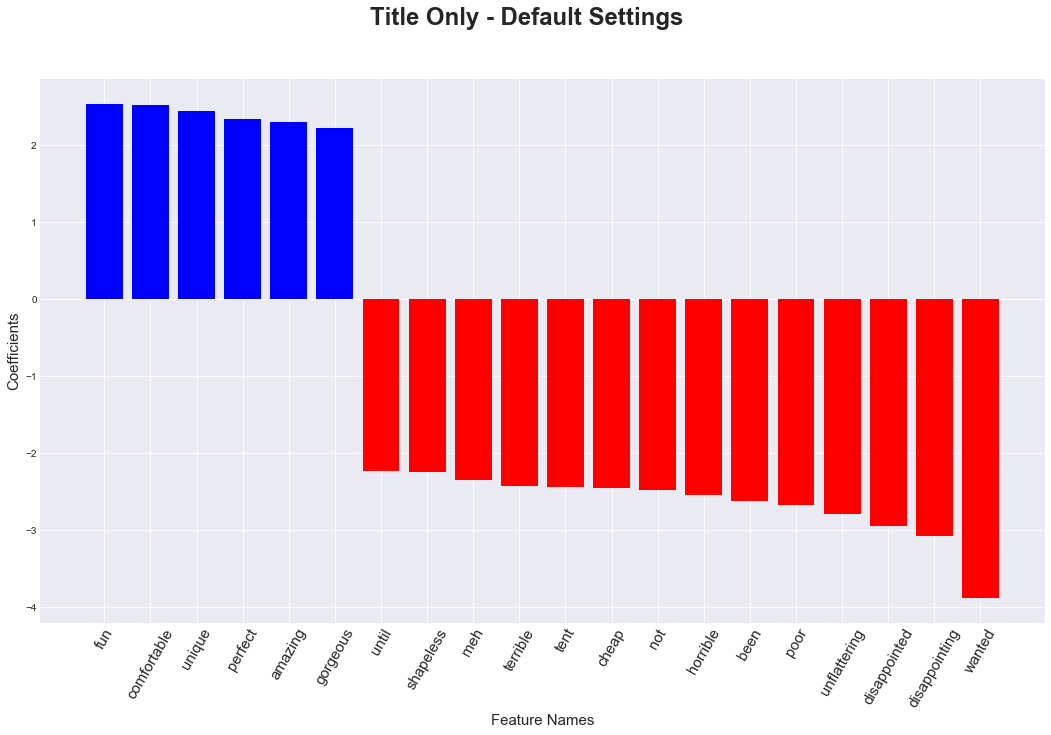

In [118]:
fig, axes = plt.subplots(1,1,figsize = (18,10))
colors = ['blue' if x > 0 else 'red' for x in top20_feat_df.Coefficient ]
axes.bar(range(20),top20_feat_df.Coefficient,color=colors)
axes.set_xticks(range(20))
axes.set_xticklabels(top20_feat_df.Feature,fontdict={'fontsize':15},
                     rotation = 60)
axes.set_xlabel("Feature Names",fontsize=15)
axes.set_ylabel("Coefficients",fontsize=15)
plt.suptitle("Title Only \
- Default Settings",fontsize=24,fontweight='bold')
plt.show()

### Tune the regularization parameter of the classifier
**Using Gridsearch**:

In [14]:
param_grid_1 = {'logisticregression__C': np.logspace(-3, 3, 10),
                'logisticregression__class_weight': ['balanced',None]}
grid_logit_1 = GridSearchCV(make_pipeline(CountVectorizer(),
                                          LogisticRegression(),
                                          memory = "cache_folder"),
                          param_grid= param_grid_1,
                            scoring=ROC_AUC_score, cv=5)
grid_logit_1.fit(X_train_title,y_train_1)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03]), 'logisticregression__class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [251]:
print("Best params:")
for key,value in grid_logit_1.best_params_.items():
    print("{}: {}".format(key,value))
    


Best params:
logisticregression__C: 0.46415888336127775
logisticregression__class_weight: balanced


**model performance**

In [16]:
train_11_pred = grid_logit_1.best_estimator_.predict(
    non_title_train['Title'].values)
train_11_avg_pre = average_precision_score(y_train_1,
                                           train_11_pred)
train_auc_11_score = roc_auc_score(y_train_1, train_11_pred)
train_f1_11_score = f1_score(y_train_1, train_11_pred)
print("Training data scores:")
print("AUC score:", train_auc_11_score)
print("Average precision:", train_11_avg_pre)
print("f1_score:", train_f1_11_score)

Training data scores:
AUC score: 0.8985262296396176
Average precision: 0.9601325090697324
f1_score: 0.927780033644643


In [17]:
test_11_pred = grid_logit_1.best_estimator_.predict(
    test_df['Title'].values)
test_11_avg_pre = average_precision_score(y_test_1, test_11_pred)
test_auc_11_score = roc_auc_score(y_test_1, test_11_pred)
test_f1_11_score = f1_score(y_test_1, test_11_pred)
print("Test data scores:")
print("AUC score:", test_auc_11_score)
print("Average precision:", test_11_avg_pre)
print("f1_score:", test_f1_11_score)

Test data scores:
AUC score: 0.795705697351084
Average precision: 0.9236284919548926
f1_score: 0.8220392653578216


### visualize the 20 most important features after regularization.

In [247]:
feature_names_1 = grid_logit_1.best_estimator_\
.steps[0][1].get_feature_names()
coef_11 = grid_logit_1.best_estimator_.steps[1][1].coef_[0]
top_20_feat = (np.absolute(coef_11).argsort())[-20:]
top20_feat_names = np.array(feature_names_1)[top_20_feat]
top20_coef = coef_11[top_20_feat]
top20_feat_df = pd.DataFrame(list(zip(top20_feat_names,top20_coef)),
                             columns = ['Feature','Coefficient'])
top20_feat_df = top20_feat_df.sort_values(by='Coefficient',
                                          ascending = False)
print(top20_feat_df)

          Feature  Coefficient
14            fun     2.443796
12         unique     2.356931
11    comfortable     2.329832
10        amazing     2.256108
8            love     2.218451
7         perfect     2.213158
6        gorgeous     2.164931
3       versatile     1.984762
2            soft     1.961070
1           great     1.946451
0        terrible    -1.901839
4             meh    -2.027577
5            been    -2.033420
9            tent    -2.220158
13   unflattering    -2.370702
15           poor    -2.523203
16   disappointed    -2.541606
17  disappointing    -2.555690
18            not    -2.596386
19         wanted    -3.770360


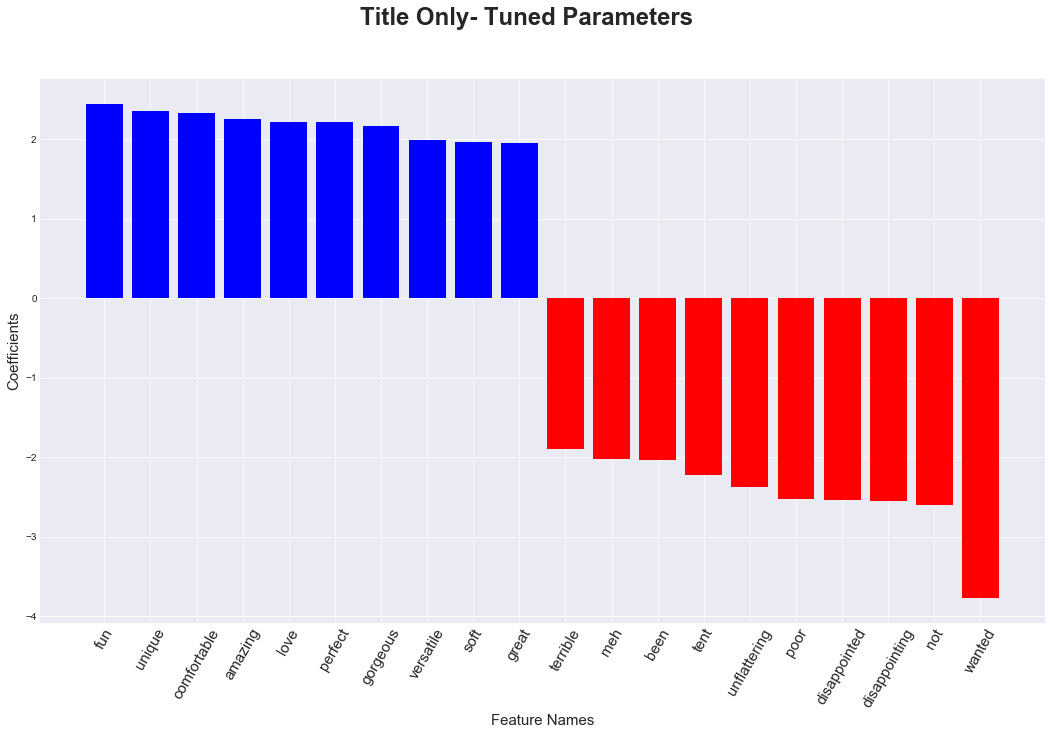

In [120]:
fig, axes = plt.subplots(1,1,figsize = (18,10))
colors = ['blue' if x > 0 else 'red' for x in top20_feat_df.Coefficient ]
axes.bar(range(20),top20_feat_df.Coefficient,color=colors)
axes.set_xticks(range(20))
axes.set_xticklabels(top20_feat_df.Feature,fontdict={'fontsize':15},
                     rotation = 60)
axes.set_xlabel("Feature Names",fontsize=15)
axes.set_ylabel("Coefficients",fontsize=15)
plt.suptitle("Title Only\
- Tuned Parameters",fontsize=24,fontweight='bold')
plt.show()

## 2) Use the review body only

In [20]:
non_review_train = train_df[train_df['Review'] != ""]
X_train_review = non_review_train['Review']
y_train_12 = non_review_train['Recommended']

In [21]:
review_vect = CountVectorizer()
review_vect.fit(X_train_review)
X_train_12 = review_vect.transform(X_train_review)
X_test_12 = review_vect.transform(test_df['Review'].values)
y_test_12 = test_df['Recommended'].values

### Use CountVectorizer with the default settings and train a linear classifier.
**Default model**

In [22]:
logit_12 = LogisticRegression()
logit_12.fit(X_train_12, y_train_12)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
train_12_pred = logit_12.predict(X_train_12)
train_12_avg_pre = average_precision_score(y_train_12,
                                           train_12_pred)
train_auc_12_score = roc_auc_score(y_train_12, train_12_pred)
train_f1_12_score = f1_score(y_train_12, train_12_pred)
print("Training data scores:")
print("AUC score:", train_auc_12_score)
print("Average precision:", train_12_avg_pre)
print("f1_score:", train_f1_12_score)

Training data scores:
AUC score: 0.9282853940810913
Average precision: 0.9695668626739299
f1_score: 0.9795918367346939


In [24]:
test_12_pred = logit_12.predict(X_test_12)
test_12_avg_pre = average_precision_score(y_test_12, test_12_pred)
test_auc_12_score = roc_auc_score(y_test_12, test_12_pred)
test_f1_12_score = f1_score(y_test_12, test_12_pred)
print("Test data scores:")
print("AUC score:", test_auc_12_score)
print("Average precision:", test_12_avg_pre)
print("f1_score:", test_f1_12_score)

Test data scores:
AUC score: 0.8001125545649561
Average precision: 0.9211072269943625
f1_score: 0.9399129961935834


### Visualize the 20 most important features in the linear model.
**Visualizing coefficients**

In [121]:
feature_names_12 = review_vect.get_feature_names()
coef_12 = logit_12.coef_[0]
top_20_feat = (np.absolute(coef_12).argsort())[-20:]
top20_feat_names = np.array(feature_names_12)[top_20_feat]
top20_coef = coef_12[top_20_feat]
top20_feat_df = pd.DataFrame(list(zip(top20_feat_names,top20_coef)),
                             columns = ['Feature','Coefficient'])
top20_feat_df = top20_feat_df.sort_values(by='Coefficient',
                                          ascending = False)
print(top20_feat_df)

         Feature  Coefficient
14       dressed     1.595586
13        subtle     1.587195
11       justice     1.573477
7         keeper     1.500730
3    compliments     1.404904
1         pencil     1.393275
0        weirdly    -1.390041
2        minutes    -1.393589
4          hopes    -1.425897
5      returning    -1.434910
6           sack    -1.493583
8        netting    -1.501687
9            lay    -1.506121
10      returned    -1.538368
12  disappointed    -1.581546
15          poor    -1.604438
16         cheap    -1.671827
17      horrible    -1.727163
18         shame    -2.049287
19         awful    -2.273324


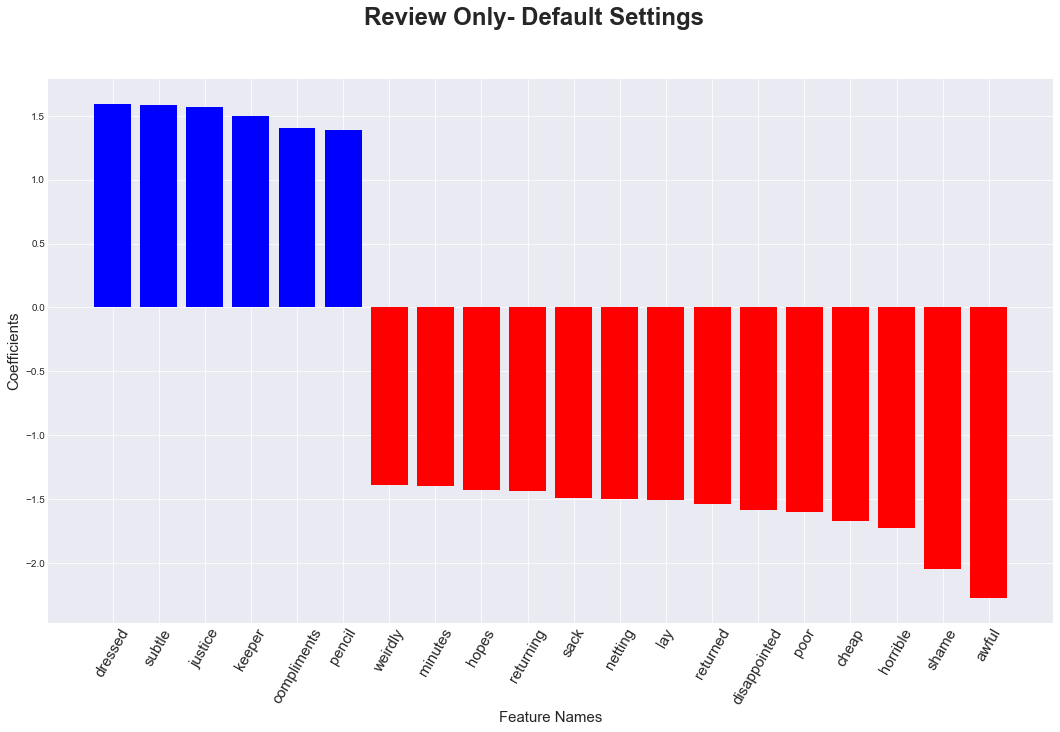

In [122]:
fig, axes = plt.subplots(1,1,figsize = (18,10))
colors = ['blue' if x > 0 else 'red' for x in top20_feat_df.Coefficient ]
axes.bar(range(20),top20_feat_df.Coefficient,color=colors)
axes.set_xticks(range(20))
axes.set_xticklabels(top20_feat_df.Feature,fontdict={'fontsize':15},
                     rotation = 60)
axes.set_xlabel("Feature Names",fontsize=15)
axes.set_ylabel("Coefficients",fontsize=15)
plt.suptitle("Review Only\
- Default Settings",fontsize=24,fontweight='bold')
plt.show()

### Tune the regularization parameter of the classifier
**Tuning the parameters**

In [27]:
param_grid_12 = {'logisticregression__C': np.logspace(-3, 3, 10),
                 'logisticregression__class_weight': ['balanced',None]}
grid_logit_12 = GridSearchCV(make_pipeline(CountVectorizer(),
                                           LogisticRegression(),
                                           memory = "cache_folder"),
                          param_grid= param_grid_12,
                             scoring=ROC_AUC_score, cv=5)
grid_logit_12.fit(non_review_train['Review'].values,y_train_12)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03]), 'logisticregression__class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [252]:
print("Best params:")
for key,value in grid_logit_12.best_params_.items():
    print("{}: {}".format(key,value))

Best params:
logisticregression__C: 0.021544346900318832
logisticregression__class_weight: balanced


**model accuracy**

In [29]:
train_121_pred = grid_logit_12.best_estimator_.predict(
    non_review_train['Review'].values)
train_121_avg_pre = average_precision_score(y_train_12,
                                            train_121_pred)
train_auc_121_score = roc_auc_score(y_train_12, train_121_pred)
train_f1_121_score = f1_score(y_train_12, train_121_pred)
print("Training data scores:")
print("AUC score:", train_auc_121_score)
print("Average precision:", train_121_avg_pre)
print("f1_score:", train_f1_121_score)

Training data scores:
AUC score: 0.8937279821444034
Average precision: 0.9583186019139208
f1_score: 0.9247888321278641


In [30]:
test_121_pred = grid_logit_12.best_estimator_.predict(
    test_df['Review'].values)
test_121_avg_pre = average_precision_score(y_test_12,
                                           test_121_pred)
test_auc_121_score = roc_auc_score(y_test_12, test_121_pred)
test_f1_121_score = f1_score(y_test_12, test_121_pred)
print("Test data scores:")
print("AUC score:", test_auc_121_score)
print("Average precision:", test_121_avg_pre)
print("f1_score:", test_f1_121_score)

Test data scores:
AUC score: 0.8482935343969292
Average precision: 0.9419219342133278
f1_score: 0.8940967072085434


### visualize the 20 most important features after regularization.

In [123]:
feature_names_12 = grid_logit_12.best_estimator_\
.steps[0][1].get_feature_names()
coef_121 = grid_logit_12.best_estimator_.steps[1][1].coef_[0]
top_20_feat = (np.absolute(coef_121).argsort())[-20:]
top20_feat_names = np.array(feature_names_12)[top_20_feat]
top20_coef = coef_121[top_20_feat]
top20_feat_df = pd.DataFrame(list(zip(top20_feat_names,top20_coef)),
                             columns = ['Feature','Coefficient'])
top20_feat_df = top20_feat_df.sort_values(by='Coefficient',
                                          ascending = False)
print(top20_feat_df)

          Feature  Coefficient
17        perfect     0.672865
14    comfortable     0.640960
11           love     0.600464
10    compliments     0.538387
8           great     0.532263
6          little     0.506530
5            fits     0.493497
3          unique     0.478109
1            soft     0.474046
0       perfectly     0.471271
2   unfortunately    -0.475947
4    unflattering    -0.490206
7          return    -0.530755
9          looked    -0.538312
12          cheap    -0.603641
13           huge    -0.605710
15       returned    -0.650093
16      returning    -0.668760
18         wanted    -0.724589
19   disappointed    -0.789857


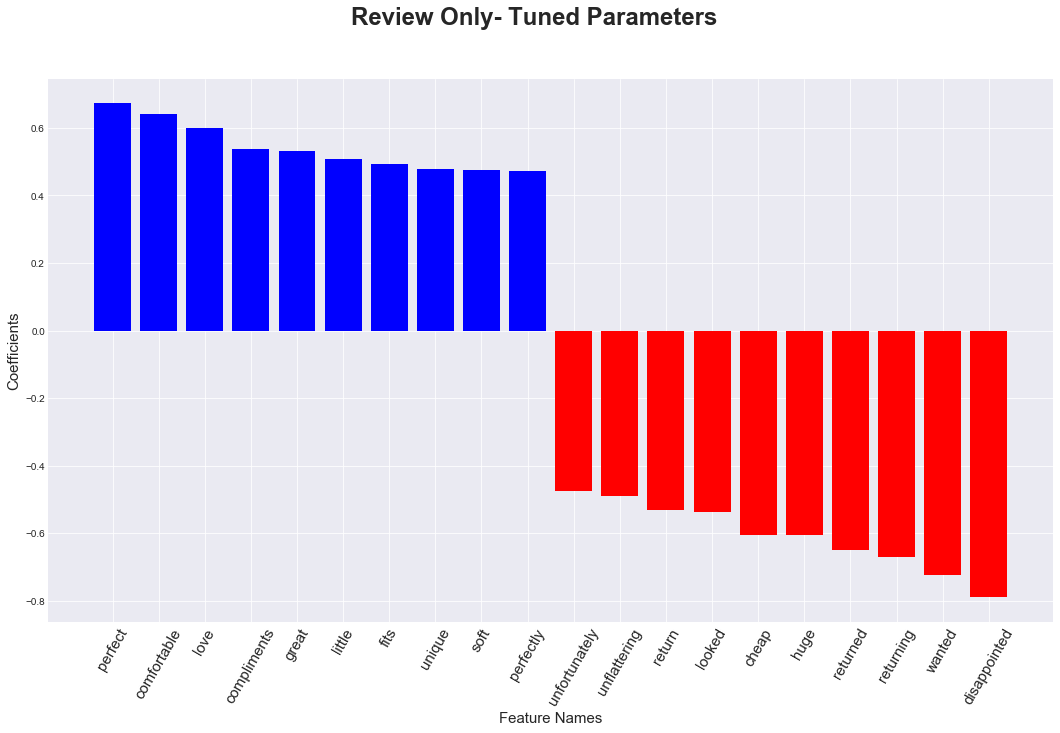

In [124]:
fig, axes = plt.subplots(1,1,figsize = (18,10))
colors = ['blue' if x > 0 else 'red' for x in top20_feat_df.Coefficient ]
axes.bar(range(20),top20_feat_df.Coefficient,color=colors)
axes.set_xticks(range(20))
axes.set_xticklabels(top20_feat_df.Feature,fontdict={'fontsize':15},
                     rotation = 60)
axes.set_xlabel("Feature Names",fontsize=15)
axes.set_ylabel("Coefficients",fontsize=15)
plt.suptitle("Review Only\
- Tuned Parameters",fontsize=24,fontweight='bold')
plt.show()

# 1.3 Concatenate the title and review to a single text and analyze that (discarding the information which words were in the title and which in the body)

In [33]:
train_df['text'] = train_df['Title'] + ' '+ train_df['Review']
test_df['text'] = test_df['Title'] + ' ' + test_df['Review']
non_text_train = train_df[train_df['text'] != " "]
X_train_text = non_text_train['text']
y_train_13 = non_text_train['Recommended']

In [34]:
text_vect = CountVectorizer()
text_vect.fit(X_train_text)
X_train_13 = text_vect.transform(X_train_text)
X_test_13 = text_vect.transform(test_df['text'].values)
y_test_13 = test_df['Recommended'].values

### Use CountVectorizer with the default settings and train a linear classifier.

In [35]:
logit_13 = LogisticRegression()
logit_13.fit(X_train_13, y_train_13)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
train_13_pred = logit_13.predict(X_train_13)
train_13_avg_pre = average_precision_score(y_train_13,
                                           train_13_pred)
train_auc_13_score = roc_auc_score(y_train_13, train_13_pred)
train_f1_13_score = f1_score(y_train_13, train_13_pred)
print("Training data scores:")
print("AUC score:", train_auc_13_score)
print("Average precision:", train_13_avg_pre)
print("f1_score:", train_f1_13_score)

Training data scores:
AUC score: 0.9494985849429748
Average precision: 0.9784718514485838
f1_score: 0.9846697550026268


In [37]:
test_13_pred = logit_13.predict(X_test_13)
test_13_avg_pre = average_precision_score(y_test_13,
                                          test_13_pred)
test_auc_13_score = roc_auc_score(y_test_13, test_13_pred)
test_f1_13_score = f1_score(y_test_13, test_13_pred)
print("Test data scores:")
print("AUC score:", test_auc_13_score)
print("Average precision:", test_13_avg_pre)
print("f1_score:", test_f1_13_score)

Test data scores:
AUC score: 0.8203476622685182
Average precision: 0.9286481304040891
f1_score: 0.9443231441048034


### Visualize the 20 most important features in the linear model.

In [125]:
feature_names_13 = text_vect.get_feature_names()
coef_13 = logit_13.coef_[0]
top_20_feat = (np.absolute(coef_13).argsort())[-20:]
top20_feat_names = np.array(feature_names_13)[top_20_feat]
top20_coef = coef_13[top_20_feat]
top20_feat_df = pd.DataFrame(list(zip(top20_feat_names,top20_coef)),
                             columns = ['Feature','Coefficient'])
top20_feat_df = top20_feat_df.sort_values(by='Coefficient',
                                          ascending = False)
print(top20_feat_df)

          Feature  Coefficient
9          keeper     1.540920
2       midweight     1.444352
0         dressed     1.419622
1         minutes    -1.420829
3          wanted    -1.451648
4         netting    -1.455514
5           cheap    -1.468431
6        returned    -1.496595
7            poor    -1.519433
8        planning    -1.536645
10      shapeless    -1.542689
11           sack    -1.657944
12     impossible    -1.663781
13   disappointed    -1.676530
14  disappointing    -1.746546
15             eh    -1.786089
16       horrible    -1.883344
17          awful    -2.056389
18          shame    -2.084867
19            meh    -2.293666


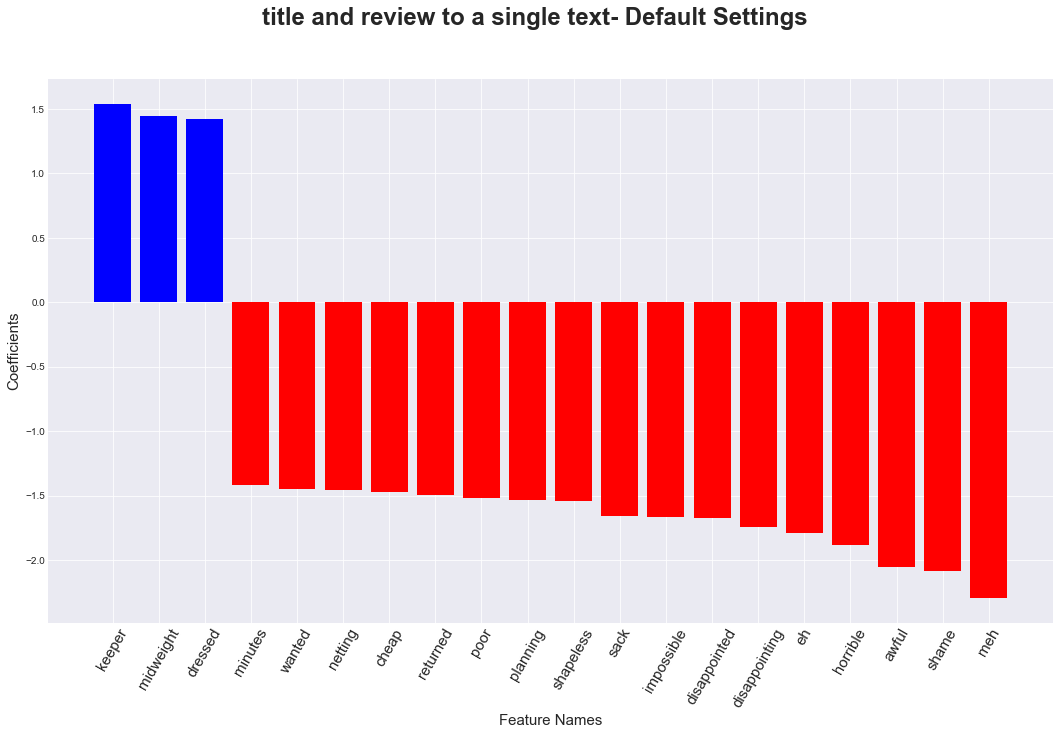

In [126]:
fig, axes = plt.subplots(1,1,figsize = (18,10))
colors = ['blue' if x > 0 else 'red' for x in top20_feat_df.Coefficient ]
axes.bar(range(20),top20_feat_df.Coefficient,color=colors)
axes.set_xticks(range(20))
axes.set_xticklabels(top20_feat_df.Feature,fontdict={'fontsize':15},
                     rotation = 60)
axes.set_xlabel("Feature Names",fontsize=15)
axes.set_ylabel("Coefficients",fontsize=15)
plt.suptitle("title and review to a single text\
- Default Settings",fontsize=24,fontweight='bold')
plt.show()

## Tune the regularization parameter of the classifier

In [40]:
param_grid_13 = {'logisticregression__C': np.logspace(-3, 3, 10),
                 'logisticregression__class_weight': ['balanced',None]}
grid_logit_13 = GridSearchCV(make_pipeline(CountVectorizer(),
                                           LogisticRegression(),
                                           memory = "cache_folder"),
                          param_grid= param_grid_13,
                             scoring=ROC_AUC_score,
                             cv=5)
grid_logit_13.fit(non_text_train['text'].values,y_train_13)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03]), 'logisticregression__class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [253]:
print("Best params:")
for key,value in grid_logit_13.best_params_.items():
    print("{}: {}".format(key,value))

Best params:
logisticregression__C: 0.021544346900318832
logisticregression__class_weight: balanced


**model accuracy**

In [42]:
train_131_pred = grid_logit_13.best_estimator_.predict(
    non_text_train['text'].values)
train_131_avg_pre = average_precision_score(y_train_13, 
                                            train_131_pred)
train_auc_131_score = roc_auc_score(y_train_13, train_131_pred)
train_f1_131_score = f1_score(y_train_13, train_131_pred)
print("Training data scores:")
print("AUC score:", train_auc_131_score)
print("Average precision:", train_131_avg_pre)
print("f1_score:", train_f1_131_score)

Training data scores:
AUC score: 0.9116135867434573
Average precision: 0.965424630117222
f1_score: 0.9358471593765713


In [43]:
test_131_pred = grid_logit_13.best_estimator_.predict(
    test_df['text'].values)
test_131_avg_pre = average_precision_score(y_test_13, test_131_pred)
test_auc_131_score = roc_auc_score(y_test_13, test_131_pred)
test_f1_131_score = f1_score(y_test_13, test_131_pred)
print("Test data scores:")
print("AUC score:", test_auc_131_score)
print("Average precision:", test_131_avg_pre)
print("f1_score:", test_f1_131_score)

Test data scores:
AUC score: 0.8655640226464869
Average precision: 0.9485541621720895
f1_score: 0.904530028036004


## visualize the 20 most important features after regularization.

In [130]:
feature_names_131 = grid_logit_13.best_estimator_\
.steps[0][1].get_feature_names()
coef_131 = grid_logit_13.best_estimator_.steps[1][1].coef_[0]
top_20_feat = (np.absolute(coef_131).argsort())[-20:]
top20_feat_names = np.array(feature_names_131)[top_20_feat]
top20_coef = coef_131[top_20_feat]
top20_feat_df = pd.DataFrame(list(zip(top20_feat_names,
                                      top20_coef)),
                             columns = ['Feature','Coefficient'])
top20_feat_df = top20_feat_df.sort_values(by='Coefficient',
                                          ascending = False)
print(top20_feat_df)

         Feature  Coefficient
17       perfect     0.679250
16   comfortable     0.638159
14          love     0.618718
12        unique     0.596973
10         great     0.572004
5           soft     0.487816
4         little     0.485258
2    compliments     0.470932
1            fun     0.451325
0        amazing     0.445633
3           poor    -0.482763
6         return    -0.496944
7         looked    -0.533277
8   unflattering    -0.556500
9          cheap    -0.571250
11     returning    -0.582538
13      returned    -0.616252
15          huge    -0.620824
18        wanted    -0.820709
19  disappointed    -0.831356


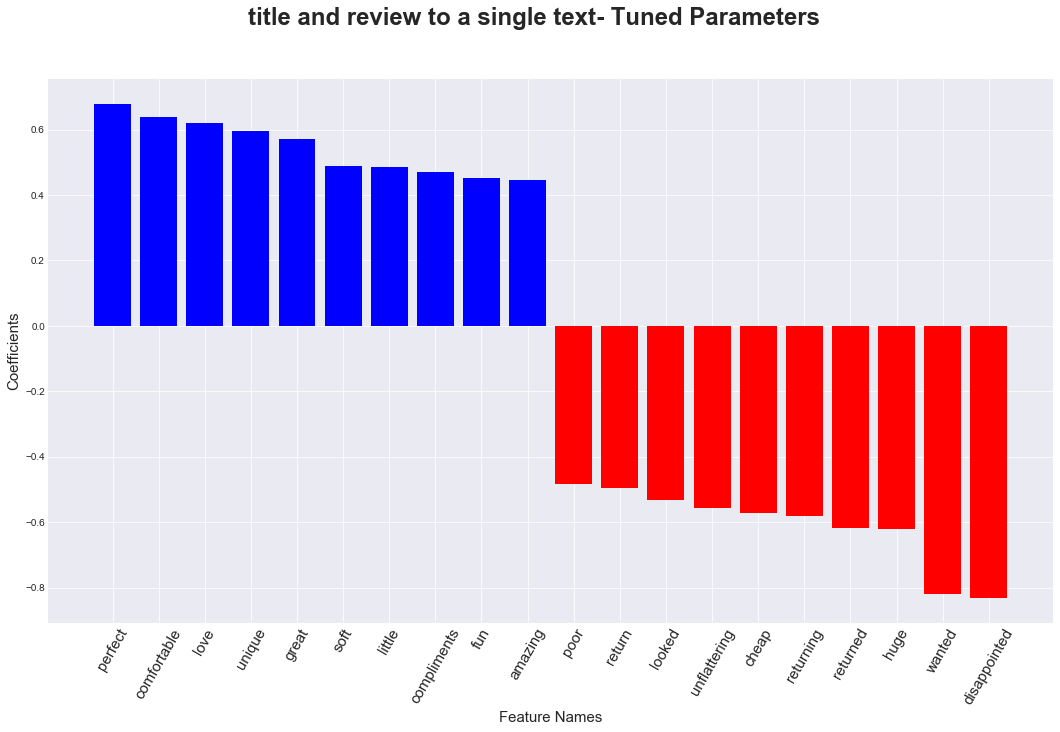

In [131]:
fig, axes = plt.subplots(1,1,figsize = (18,10))
colors = ['blue' if x > 0 else 'red' for x in top20_feat_df.Coefficient ]
axes.bar(range(20),top20_feat_df.Coefficient,color=colors)
axes.set_xticks(range(20))
axes.set_xticklabels(top20_feat_df.Feature,fontdict={'fontsize':15},
                     rotation = 60)
axes.set_xlabel("Feature Names",fontsize=15)
axes.set_ylabel("Coefficients",fontsize=15)
plt.suptitle("title and review to a single text\
- Tuned Parameters",fontsize=24,fontweight='bold')
plt.show()

# 1.4 Vectorizing title and review individually and concatenating the vector representations. Vectorizing title and review seperately

In [46]:
X_train_v_title = non_text_train['Title']
X_train_v_review = non_text_train['Review']
X_test_v_title = test_df['Title']
X_test_v_review = test_df['Review']

In [47]:
title_v_vect = CountVectorizer()
title_v_vect.fit(X_test_v_title.values)
X_train_14_title = title_v_vect.transform(X_train_v_title)
X_test_14_title = title_v_vect.transform(X_test_v_title)
review_v_vect = CountVectorizer()
review_v_vect.fit(X_train_v_review)
X_train_14_review = review_v_vect.transform(X_train_v_review)
X_test_14_review = review_v_vect.transform(X_test_v_review)

In [48]:
X_train_14 = hstack([X_train_14_title, X_train_14_review])
X_test_14 = hstack([X_test_14_title, X_test_14_review])
y_train_14 = non_text_train['Recommended'].values
y_test_14 = test_df['Recommended'].values

## Use CountVectorizer with the default settings and train a linear classifier.

In [49]:
logit_14 = LogisticRegression()
logit_14.fit(X_train_14, y_train_14)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
train_14_pred = logit_14.predict(X_train_14)
train_14_avg_pre = average_precision_score(y_train_14, train_14_pred)
train_auc_14_score = roc_auc_score(y_train_14, train_14_pred)
train_f1_14_score = f1_score(y_train_14, train_14_pred)
print("Training data scores:")
print("AUC score:", train_auc_14_score)
print("Average precision:", train_14_avg_pre)
print("f1_score:", train_f1_14_score)

Training data scores:
AUC score: 0.9592464574912677
Average precision: 0.9825496245754952
f1_score: 0.9878147847278634


In [51]:
test_14_pred = logit_14.predict(X_test_14)
test_14_avg_pre = average_precision_score(y_test_14, test_14_pred)
test_auc_14_score = roc_auc_score(y_test_14, test_14_pred)
test_f1_14_score = f1_score(y_test_14, test_14_pred)
print("Test data scores:")
print("AUC score:", test_auc_14_score)
print("Average precision:", test_14_avg_pre)
print("f1_score:", test_f1_14_score)

Test data scores:
AUC score: 0.8221786157624407
Average precision: 0.9293210079381173
f1_score: 0.9451568894952251


## Visualize the 20 most important features in the linear model.

In [132]:
feature_names_14 = np.hstack((title_v_vect.get_feature_names(),
                              review_v_vect.get_feature_names()))
coef_14 = logit_14.coef_[0]
top_20_feat = (np.absolute(coef_14).argsort())[-20:]
top20_feat_names = np.array(feature_names_14)[top_20_feat]
top20_coef = coef_14[top_20_feat]
top20_feat_df = pd.DataFrame(list(zip(top20_feat_names,top20_coef)),
                             columns = ['Feature','Coefficient'])
top20_feat_df = top20_feat_df.sort_values(by='Coefficient',
                                          ascending = False)
print(top20_feat_df)

          Feature  Coefficient
14       gorgeous     1.762412
13        perfect     1.718581
10        dressed     1.660309
9            love     1.653608
6          unique     1.617115
4            nice     1.555677
3         amazing     1.544591
0        horrible    -1.513944
1           sheer    -1.514602
2           space    -1.543192
5         strange    -1.565145
7           weird    -1.622500
8           shame    -1.626913
11   unflattering    -1.664751
12            not    -1.699826
15          awful    -1.827233
16  disappointing    -1.858792
17   disappointed    -2.016731
18            meh    -2.275663
19         wanted    -2.366062


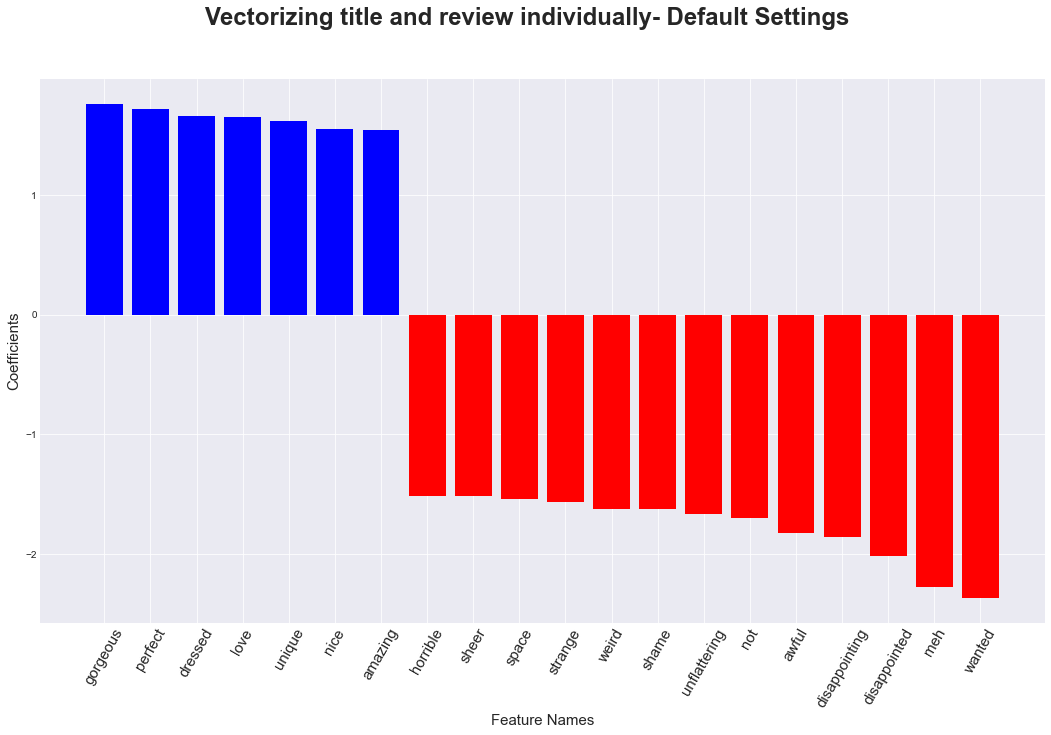

In [133]:
fig, axes = plt.subplots(1,1,figsize = (18,10))
colors = ['blue' if x > 0 else 'red' for x in top20_feat_df.Coefficient ]
axes.bar(range(20),top20_feat_df.Coefficient,color=colors)
axes.set_xticks(range(20))
axes.set_xticklabels(top20_feat_df.Feature,fontdict={'fontsize':15},
                     rotation = 60)
axes.set_xlabel("Feature Names",fontsize=15)
axes.set_ylabel("Coefficients",fontsize=15)
plt.suptitle("Vectorizing title and review individually\
- Default Settings",fontsize=24,fontweight='bold')
plt.show()

## Tune the regularization parameter of the classifier

In [54]:
param_grid_14 = {'C': np.logspace(-3, 3, 10), 
                 'class_weight': ['balanced',None]}
grid_logit_14 = GridSearchCV(LogisticRegression(),
                          param_grid= param_grid_14,
                             scoring=ROC_AUC_score)
grid_logit_14.fit(X_train_14,y_train_14)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03]), 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [254]:
#print("Best params:", grid_logit_14.best_params_)

print("Best params:")
for key,value in grid_logit_14.best_params_.items():
    print("{}: {}".format(key,value))

Best params:
C: 0.021544346900318832
class_weight: balanced


**model accuracy**

In [56]:
train_141_pred = grid_logit_14.best_estimator_.predict(
    X_train_14)
train_141_avg_pre = average_precision_score(y_train_14,
                                            train_141_pred)
train_auc_141_score = roc_auc_score(y_train_14,
                                    train_141_pred)
train_f1_141_score = f1_score(y_train_14, train_141_pred)
print("Training data scores:")
print("AUC score:", train_auc_141_score)
print("Average precision:", train_141_avg_pre)
print("f1_score:", train_f1_141_score)

Training data scores:
AUC score: 0.9139033688613589
Average precision: 0.9664405552201415
f1_score: 0.9358703312191685


In [57]:
test_141_pred = grid_logit_14.best_estimator_.predict(X_test_14)
test_141_avg_pre = average_precision_score(y_test_14,
                                           test_141_pred)
test_auc_141_score = roc_auc_score(y_test_14, test_141_pred)
test_f1_141_score = f1_score(y_test_14, test_141_pred)
print("Test data scores:")
print("AUC score:", test_auc_141_score)
print("Average precision:", test_141_avg_pre)
print("f1_score:", test_f1_141_score)

Test data scores:
AUC score: 0.863921954636415
Average precision: 0.9478707838196935
f1_score: 0.9044529637275139


## visualize the 20 most important features after regularization.

In [134]:
feature_names_14 = np.hstack((title_v_vect.get_feature_names(),
                              review_v_vect.get_feature_names()))
coef_141 = grid_logit_14.best_estimator_.coef_[0]
top_20_feat = (np.absolute(coef_141).argsort())[-20:]
top20_feat_names = np.array(feature_names_14)[top_20_feat]
top20_coef = coef_141[top_20_feat]
top20_feat_df = pd.DataFrame(list(zip(top20_feat_names,top20_coef)),
                             columns = ['Feature','Coefficient'])
top20_feat_df = top20_feat_df.sort_values(by='Coefficient',
                                          ascending = False)
print(top20_feat_df)

         Feature  Coefficient
16         great     0.642794
12          love     0.599807
11       perfect     0.594736
10   comfortable     0.582039
7           love     0.543820
3    compliments     0.471021
2       gorgeous     0.465226
1           fits     0.462131
0          great     0.461850
4         wanted    -0.478308
5         return    -0.480708
6         looked    -0.509386
8           huge    -0.556796
9          cheap    -0.562871
13     returning    -0.600451
14           too    -0.607378
15      returned    -0.622426
17        wanted    -0.663424
18  disappointed    -0.737451
19           not    -0.835216


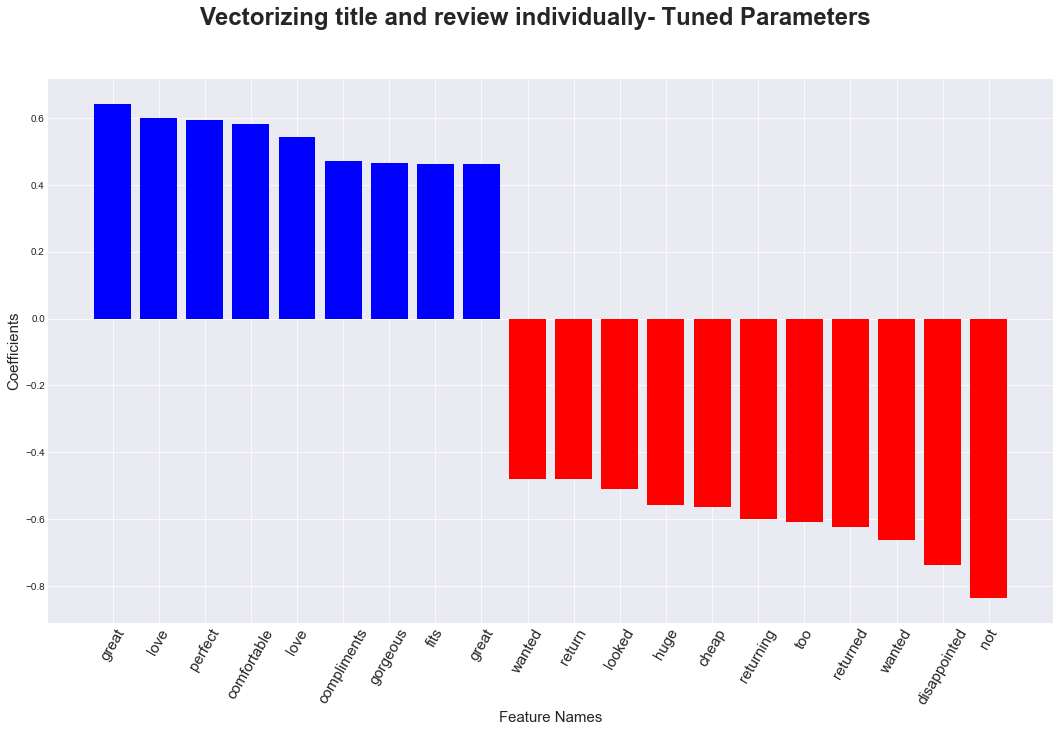

In [135]:
fig, axes = plt.subplots(1,1,figsize = (18,10))
colors = ['blue' if x > 0 else 'red' for x in top20_feat_df.Coefficient ]
axes.bar(range(20),top20_feat_df.Coefficient,color=colors)
axes.set_xticks(range(20))
axes.set_xticklabels(top20_feat_df.Feature,fontdict={'fontsize':15},
                     rotation = 60)
axes.set_xlabel("Feature Names",fontsize=15)
axes.set_ylabel("Coefficients",fontsize=15)
plt.suptitle("Vectorizing title and review individually\
- Tuned Parameters",fontsize=24,fontweight='bold')
plt.show()

## Do this for all 4 settings. Which one works best?

* Comparing all the models' AUC score, **concatenating title and review(1.3)** has the best performance - **0.8655**
* Comparing all the models' Average Precision score, **concatenating title and review(1.3)** has the best performance - **0.94855**

In [60]:
main_test_data['text'] = main_test_data['Title'] + ' ' + main_test_data['Review']
y_test_main = main_test_data['Recommended'].values

In [61]:
main_test_pred = grid_logit_13.best_estimator_.predict(
    main_test_data['text'].values)
main_test_avg_pre = average_precision_score(y_test_main,
                                            main_test_pred)
main_test_auc_score = roc_auc_score(y_test_main, main_test_pred)
main_test_f1_score = f1_score(y_test_main, main_test_pred)
print("Test data scores:")
print("AUC score:", main_test_auc_score)
print("Average precision:", main_test_avg_pre)
print("f1_score:", main_test_f1_score)

Test data scores:
AUC score: 0.8477058249267817
Average precision: 0.9415130395148659
f1_score: 0.8969643252825171


# Task 2 Feature Tuning (30Pts)

## 2.1 Try using TfidfVectorizer instead of CountVectorizer.

In [62]:
X_train_text2 = non_text_train['text'].values
y_train_2 = non_text_train['Recommended'].values
y_test_2 = test_df['Recommended'].values

In [140]:
param_grid_21 = {'logisticregression__C': np.logspace(-3, 3, 10),
                 'logisticregression__class_weight': ['balanced',None]}
grid_logit_21 = GridSearchCV(make_pipeline(TfidfVectorizer(), 
                                           LogisticRegression(),
                                           memory = "cache_folder"),
                          param_grid= param_grid_21,
                             scoring=ROC_AUC_score, cv=5)
grid_logit_21.fit(non_text_train['text'].values,y_train_2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03]), 'logisticregression__class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [255]:
#print("Best params:", grid_logit_21.best_params_)

print("Best params:")
for key,value in grid_logit_21.best_params_.items():
    print("{}: {}".format(key,value))

Best params:
logisticregression__C: 0.46415888336127775
logisticregression__class_weight: balanced


In [142]:
train_21_pred = grid_logit_21.best_estimator_.predict(
    non_text_train['text'].values)
train_21_avg_pre = average_precision_score(y_train_2, 
                                           train_21_pred)
train_auc_21_score = roc_auc_score(y_train_2, train_21_pred)
train_f1_21_score = f1_score(y_train_2, train_21_pred)
print("Training data scores:")
print("AUC score:", train_auc_21_score)
print("Average precision:", train_21_avg_pre)
print("f1_score:", train_f1_21_score)

Training data scores:
AUC score: 0.9169889567906642
Average precision: 0.9678218372872635
f1_score: 0.9358075740003026


In [143]:
test_21_pred = grid_logit_21.best_estimator_.predict(
    test_df['text'].values)
test_21_avg_pre = average_precision_score(y_test_2,
                                          test_21_pred)
test_auc_21_score = roc_auc_score(y_test_2, test_21_pred)
test_f1_21_score = f1_score(y_test_2, test_21_pred)
print("Test data scores:")
print("AUC score:", test_auc_21_score)
print("Average precision:", test_21_avg_pre)
print("f1_score:", test_f1_21_score)

Test data scores:
AUC score: 0.8707299523655524
Average precision: 0.9506263264751209
f1_score: 0.9062730627306272


## Does it change the score? Does it change the important coefficients?

* Both the AUC score and Average precision are more for Tfidfvectorizer than that of the Countvectorizer
* This is probably becauase Tf-Idf accounts for word importance in the model

In [144]:
feature_names_21 = grid_logit_21.best_estimator_\
.steps[0][1].get_feature_names()
coef_21 = grid_logit_21.best_estimator_.steps[1][1].coef_[0]
top_20_feat = (np.absolute(coef_21).argsort())[-20:]
top20_feat_names = np.array(feature_names_21)[top_20_feat]
top20_coef = coef_21[top_20_feat]
top20_feat_df = pd.DataFrame(list(zip(top20_feat_names,top20_coef)),
                             columns = ['Feature','Coefficient'])
top20_feat_df = top20_feat_df.sort_values(by='Coefficient',
                                          ascending = False)
print(top20_feat_df)

         Feature  Coefficient
19          love     5.107718
18       perfect     4.327461
16         great     4.207437
12   comfortable     3.610174
11        little     3.431589
9           with     3.150354
7           soft     2.997458
1           fits     2.598688
0            bit     2.577153
2         return    -2.624873
3       returned    -2.733714
4      returning    -2.768935
5   unflattering    -2.807093
6          cheap    -2.994199
8         looked    -3.041450
10          huge    -3.175316
13           was    -3.996854
14        wanted    -4.014819
15           not    -4.109806
17  disappointed    -4.248884


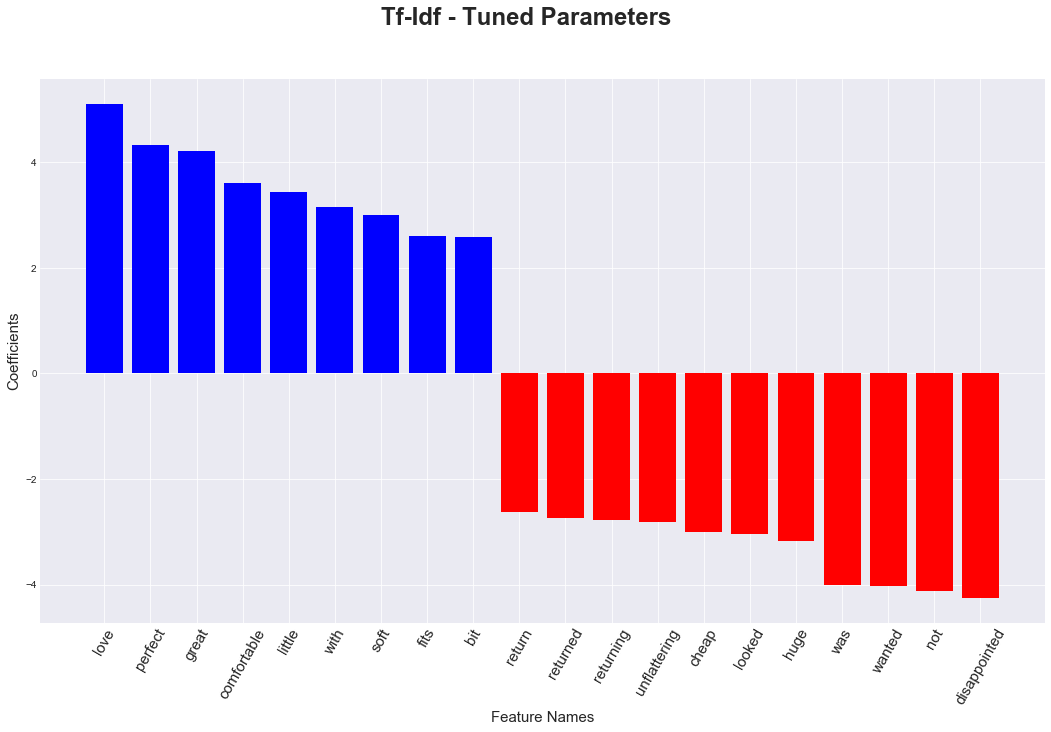

In [145]:
fig, axes = plt.subplots(1,1,figsize = (18,10))
colors = ['blue' if x > 0 else 'red' for x in top20_feat_df.Coefficient ]
axes.bar(range(20),top20_feat_df.Coefficient,color=colors)
axes.set_xticks(range(20))
axes.set_xticklabels(top20_feat_df.Feature,fontdict={'fontsize':15},
                     rotation = 60)
axes.set_xlabel("Feature Names",fontsize=15)
axes.set_ylabel("Coefficients",fontsize=15)
plt.suptitle("Tf-Idf \
- Tuned Parameters",fontsize=24,fontweight='bold')
plt.show()

## Does it change the important coefficients?

* Tf-Idf:
    * "with,bit" in Tf-Idf positive features are not present in Countvectorizer positive features
    * "returned, was" in Tf-Idf positive features are not present in Countvectorizer negative features
* CountVectorizer:
    * "fun,unique" in CountVectorizer positive features are not present in Tf-Idf positive features
    * "bad, unfortunately" in CountVectorizer positive features are not present in Tf-Idf negative features
* We observe that Tf-Idf seems to pick neutral sentiment features in its top features 

## Does using a Normalizer with CountVectorizer change the outcome?

In [69]:
param_grid_22 = {'logisticregression__C': np.logspace(-3, 3, 10),
                 'logisticregression__class_weight': ['balanced',None]}
grid_logit_22 = GridSearchCV(make_pipeline(CountVectorizer(),
                                           Normalizer(),
                                           LogisticRegression(),
                                           memory = "cache_folder"),
                          param_grid= param_grid_22, 
                             scoring=ROC_AUC_score, cv=5)
grid_logit_22.fit(non_text_train['text'].values,y_train_2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03]), 'logisticregression__class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [256]:
#print("Best params:", grid_logit_22.best_params_)
print("Best params:")
for key,value in grid_logit_22.best_params_.items():
    print("{}: {}".format(key,value))

Best params:
logisticregression__C: 2.154434690031882
logisticregression__class_weight: balanced


In [71]:
train_22_pred = grid_logit_22.best_estimator_.predict(
    non_text_train['text'].values)
train_22_avg_pre = average_precision_score(y_train_2,
                                           train_22_pred)
train_auc_22_score = roc_auc_score(y_train_2, train_22_pred)
train_f1_22_score = f1_score(y_train_2, train_22_pred)
print("Training data scores:")
print("AUC score:", train_auc_22_score)
print("Average precision:", train_22_avg_pre)
print("f1_score:", train_f1_22_score)

Training data scores:
AUC score: 0.9130911553258723
Average precision: 0.9662047117517591
f1_score: 0.9341806627326373


In [72]:
test_22_pred = grid_logit_22.best_estimator_.predict(
    test_df['text'].values)
test_22_avg_pre = average_precision_score(y_test_2,
                                          test_22_pred)
test_auc_22_score = roc_auc_score(y_test_2, test_22_pred)
test_f1_22_score = f1_score(y_test_2, test_22_pred)
print("Test data scores:")
print("AUC score:", test_auc_22_score)
print("Average precision:", test_22_avg_pre)
print("f1_score:", test_f1_22_score)

Test data scores:
AUC score: 0.8673805008042638
Average precision: 0.9493708224466458
f1_score: 0.9035788228334812


In [147]:
feature_names_22 = grid_logit_22.best_estimator_\
.steps[0][1].get_feature_names()
coef_22 = grid_logit_22.best_estimator_.steps[2][1].coef_[0]
top_20_feat = (np.absolute(coef_22).argsort())[-20:]
top20_feat_names = np.array(feature_names_22)[top_20_feat]
top20_coef = coef_22[top_20_feat]
top20_feat_df = pd.DataFrame(list(zip(top20_feat_names,top20_coef)),
                             columns = ['Feature','Coefficient'])
top20_feat_df = top20_feat_df.sort_values(by='Coefficient',
                                          ascending = False)
print(top20_feat_df)

         Feature  Coefficient
17       perfect     6.967918
16          love     6.160371
14        unique     5.634824
13   comfortable     5.478330
9          great     5.059378
6         little     4.937765
3           soft     4.632908
2            fun     4.465628
1    compliments     4.462914
0        amazing     4.354737
4           poor    -4.637098
5   unflattering    -4.929210
7         return    -5.002783
8      returning    -5.051036
10      returned    -5.097234
11        looked    -5.179436
12         cheap    -5.432595
15          huge    -5.745654
18        wanted    -7.917479
19  disappointed    -7.976181


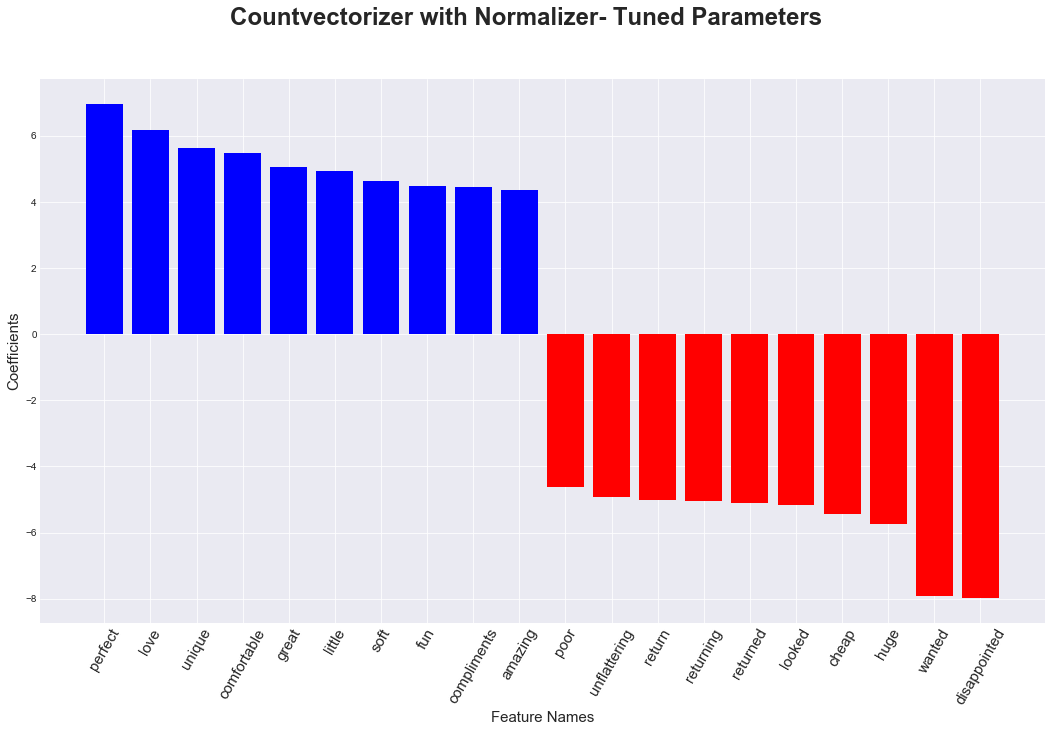

In [148]:
fig, axes = plt.subplots(1,1,figsize = (18,10))
colors = ['blue' if x > 0 else 'red' for x in top20_feat_df.Coefficient ]
axes.bar(range(20),top20_feat_df.Coefficient,color=colors)
axes.set_xticks(range(20))
axes.set_xticklabels(top20_feat_df.Feature,fontdict={'fontsize':15},
                     rotation = 60)
axes.set_xlabel("Feature Names",fontsize=15)
axes.set_ylabel("Coefficients",fontsize=15)
plt.suptitle("Countvectorizer with Normalizer\
- Tuned Parameters",fontsize=24,fontweight='bold')
plt.show()

## Does using a Normalizer with CountVectorizer change the outcome?
* By using Normalizer with the Countvectorizer did not improve the performance. 
* Tfidf performs better than countvectorizer with normalizer

## 2.3 Try using stop-word.

In [75]:
param_grid_231 = {'logisticregression__C': np.logspace(-3, 3, 10),
                  'logisticregression__class_weight': ['balanced',None]}
grid_logit_231 = GridSearchCV(make_pipeline(TfidfVectorizer(
    stop_words=eng_stopwords), LogisticRegression(),
                                            memory = "cache_folder"),
                          param_grid= param_grid_231,
                              scoring=ROC_AUC_score, cv=5)
grid_logit_231.fit(non_text_train['text'].values,y_train_2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03]), 'logisticregression__class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [257]:
#print("Best params:", grid_logit_231.best_params_)

print("Best params:")
for key,value in grid_logit_231.best_params_.items():
    print("{}: {}".format(key,value))

Best params:
logisticregression__C: 0.46415888336127775
logisticregression__class_weight: balanced


In [77]:
train_231_pred = grid_logit_231.best_estimator_.predict(
    non_text_train['text'].values)
train_231_avg_pre = average_precision_score(y_train_2,
                                            train_231_pred)
train_auc_231_score = roc_auc_score(y_train_2, train_231_pred)
train_f1_231_score = f1_score(y_train_2, train_231_pred)
print("Training data scores:")
print("AUC score:", train_auc_231_score)
print("Average precision:", train_231_avg_pre)
print("f1_score:", train_f1_231_score)

Training data scores:
AUC score: 0.9147702956060489
Average precision: 0.9668125811234703
f1_score: 0.9360588057597422


In [78]:
test_231_pred = grid_logit_231.best_estimator_.predict(
    test_df['text'].values)
test_231_avg_pre = average_precision_score(y_test_2,
                                           test_231_pred)
test_auc_231_score = roc_auc_score(y_test_2, test_231_pred)
test_f1_231_score = f1_score(y_test_2, test_231_pred)
print("Test data scores:")
print("AUC score:", test_auc_231_score)
print("Average precision:", test_231_avg_pre)
print("f1_score:", test_f1_231_score)

Test data scores:
AUC score: 0.8628829079467478
Average precision: 0.9473682061255967
f1_score: 0.9056936883919378


In [149]:
feature_names_231 = grid_logit_231.best_estimator_\
.steps[0][1].get_feature_names()
coef_231 = grid_logit_231.best_estimator_.steps[1][1].coef_[0]
top_20_feat = (np.absolute(coef_231).argsort())[-20:]
top20_feat_names = np.array(feature_names_231)[top_20_feat]
top20_coef = coef_231[top_20_feat]
top20_feat_df = pd.DataFrame(list(zip(top20_feat_names,top20_coef)),
                             columns = ['Feature','Coefficient'])
top20_feat_df = top20_feat_df.sort_values(by='Coefficient',
                                          ascending = False)
print(top20_feat_df)

          Feature  Coefficient
19           love     5.085129
18        perfect     4.610219
15          great     4.197061
14    comfortable     3.858450
13         little     3.440608
11           soft     3.115239
6            fits     2.882243
2          unique     2.723429
0   disappointing    -2.604124
1            poor    -2.629735
3   unfortunately    -2.791626
4          return    -2.817901
5    unflattering    -2.873100
7           cheap    -2.902514
8       returning    -2.944681
9          looked    -2.983027
10       returned    -3.037890
12           huge    -3.254938
16         wanted    -4.301679
17   disappointed    -4.603938


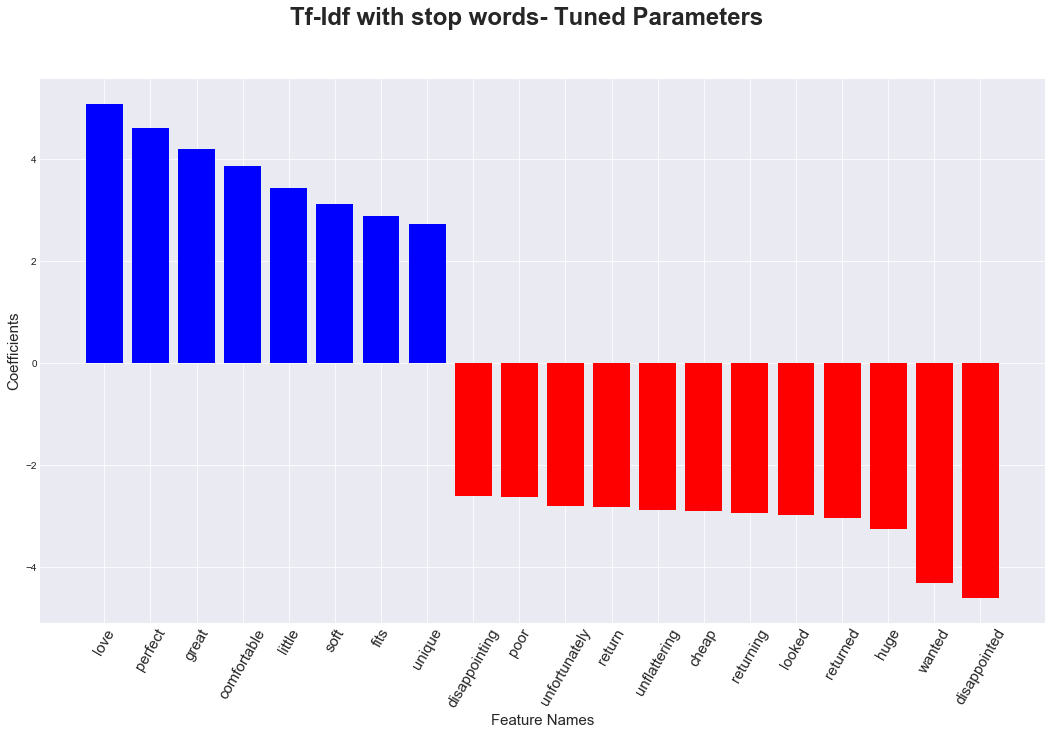

In [150]:
fig, axes = plt.subplots(1,1,figsize = (18,10))
colors = ['blue' if x > 0 else 'red' for x in top20_feat_df.Coefficient ]
axes.bar(range(20),top20_feat_df.Coefficient,color=colors)
axes.set_xticks(range(20))
axes.set_xticklabels(top20_feat_df.Feature,fontdict={'fontsize':15},
                     rotation = 60)
axes.set_xlabel("Feature Names",fontsize=15)
axes.set_ylabel("Coefficients",fontsize=15)
plt.suptitle("Tf-Idf with stop words\
- Tuned Parameters",fontsize=24,fontweight='bold')
plt.show()

### Countvectorizer with stopwords and normalizer

In [81]:
param_grid_232 = {'logisticregression__C': np.logspace(-3, 3, 10),
                  'logisticregression__class_weight': ['balanced',None]}
grid_logit_232 = GridSearchCV(make_pipeline(CountVectorizer(
    stop_words=eng_stopwords),
                                            Normalizer(), 
                                            LogisticRegression(),
                                            memory = "cache_folder"),
                          param_grid= param_grid_232, 
                              scoring=ROC_AUC_score, cv=5)
grid_logit_232.fit(non_text_train['text'].values,y_train_2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03]), 'logisticregression__class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [258]:
#print("Best params:", grid_logit_232.best_params_)
print("Best params:")
for key,value in grid_logit_232.best_params_.items():
    print("{}: {}".format(key,value))

Best params:
logisticregression__C: 2.154434690031882
logisticregression__class_weight: balanced


In [83]:
train_232_pred = grid_logit_232.best_estimator_.predict(
    non_text_train['text'].values)
train_232_avg_pre = average_precision_score(y_train_2,
                                            train_232_pred)
train_auc_232_score = roc_auc_score(y_train_2, train_232_pred)
train_f1_232_score = f1_score(y_train_2, train_232_pred)
print("Training data scores:")
print("AUC score:", train_auc_232_score)
print("Average precision:", train_232_avg_pre)
print("f1_score:", train_f1_232_score)

Training data scores:
AUC score: 0.9212057418799233
Average precision: 0.9692598750987766
f1_score: 0.9416599839615076


In [84]:
test_232_pred = grid_logit_232.best_estimator_.predict(
    test_df['text'].values)
test_232_avg_pre = average_precision_score(y_test_2, 
                                           test_232_pred)
test_auc_232_score = roc_auc_score(y_test_2, test_232_pred)
test_f1_232_score = f1_score(y_test_2, test_232_pred)
print("Test data scores:")
print("AUC score:", test_auc_232_score)
print("Average precision:", test_232_avg_pre)
print("f1_score:", test_f1_232_score)

Test data scores:
AUC score: 0.8618947014620795
Average precision: 0.9468527197008739
f1_score: 0.9075975359342915


In [151]:
feature_names_232 = grid_logit_232.best_estimator_\
.steps[0][1].get_feature_names()
coef_232 = grid_logit_232.best_estimator_.steps[2][1].coef_[0]
top_20_feat = (np.absolute(coef_232).argsort())[-20:]
top20_feat_names = np.array(feature_names_232)[top_20_feat]
top20_coef = coef_232[top_20_feat]
top20_feat_df = pd.DataFrame(list(zip(top20_feat_names,top20_coef)),
                             columns = ['Feature','Coefficient'])
top20_feat_df = top20_feat_df.sort_values(by='Coefficient',
                                          ascending = False)
print(top20_feat_df)

          Feature  Coefficient
17         unique     5.219857
16        perfect     4.957800
9         amazing     4.487568
7     compliments     4.466774
3         dressed     4.105528
2     comfortable     4.017618
0             fun     3.978915
1   unfortunately    -4.006096
4             bad    -4.134579
5           awful    -4.166104
6    unflattering    -4.353134
8            poor    -4.480358
10          cheap    -4.644704
11      returning    -4.668156
12            meh    -4.731891
13           huge    -4.756523
14       returned    -4.802934
15  disappointing    -4.808758
18         wanted    -6.193506
19   disappointed    -6.906788


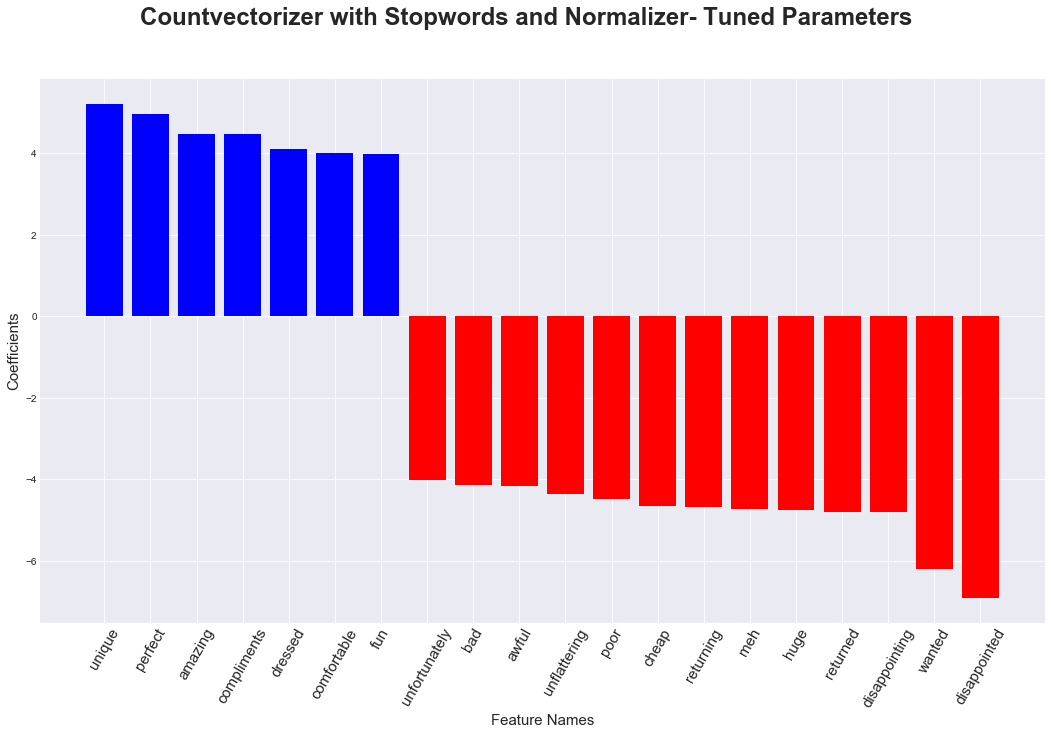

In [152]:
fig, axes = plt.subplots(1,1,figsize = (18,10))
colors = ['blue' if x > 0 else 'red' for x in top20_feat_df.Coefficient ]
axes.bar(range(20),top20_feat_df.Coefficient,color=colors)
axes.set_xticks(range(20))
axes.set_xticklabels(top20_feat_df.Feature,fontdict={'fontsize':15},
                     rotation = 60)
axes.set_xlabel("Feature Names",fontsize=15)
axes.set_ylabel("Coefficients",fontsize=15)
plt.suptitle("Countvectorizer with Stopwords and Normalizer\
- Tuned Parameters",fontsize=24,fontweight='bold')
plt.show()

## Do the standard English stop-words help? Why / why not?

** The standard english stopwords did not help. **

This could be because some of the standard english stopwords are important for classification in the given context. Exmaple - "With", "Was" by Tf-Idf



# 2.4 Limit the vocabulary using min_df or max_df

### TD-IDF with minimum document frequency:

In [165]:
param_grid_241 = {'logisticregression__C': np.logspace(-3, 3, 10),
                 'logisticregression__class_weight': ['balanced'],
                'tfidfvectorizer__min_df':[2,3,4]}
grid_logit_241 = GridSearchCV(make_pipeline(TfidfVectorizer(),
                                            LogisticRegression(),
                                            memory = "cache_folder"),
                          param_grid= param_grid_241, 
                              scoring=ROC_AUC_score, cv=5)
grid_logit_241.fit(non_text_train['text'].values,y_train_2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03]), 'logisticregression__class_weight': ['balanced'], 'tfidfvectorizer__min_df': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [259]:
#print("Best params:", grid_logit_241.best_params_)
print("Best params:")
for key,value in grid_logit_241.best_params_.items():
    print("{}: {}".format(key,value))

Best params:
logisticregression__C: 0.46415888336127775
logisticregression__class_weight: balanced
tfidfvectorizer__min_df: 2


In [167]:
train_241_pred = grid_logit_241.best_estimator_.predict(
    non_text_train['text'].values)
train_241_avg_pre = average_precision_score(y_train_2, 
                                            train_241_pred)
train_auc_241_score = roc_auc_score(y_train_2, train_241_pred)
train_f1_241_score = f1_score(y_train_2, train_241_pred)
print("Training data scores:")
print("AUC score:", train_auc_241_score)
print("Average precision:", train_241_avg_pre)
print("f1_score:", train_f1_241_score)

Training data scores:
AUC score: 0.9163156162354368
Average precision: 0.9675483853156527
f1_score: 0.935444825499294


In [168]:
test_241_pred = grid_logit_241.best_estimator_.predict(
    test_df['text'].values)
test_241_avg_pre = average_precision_score(y_test_2,
                                           test_241_pred)
test_auc_241_score = roc_auc_score(y_test_2, test_241_pred)
test_f1_241_score = f1_score(y_test_2, test_241_pred)
print("Test data scores:")
print("AUC score:", test_auc_241_score)
print("Average precision:", test_241_avg_pre)
print("f1_score:", test_f1_241_score)

Test data scores:
AUC score: 0.8713693385548107
Average precision: 0.9508881557032365
f1_score: 0.9064068497195158


In [248]:
print("Number of features after applying minimum document frequency are:")
print(len(grid_logit_241.best_estimator_\
          .steps[0][1].get_feature_names()))

Number of features after applying minimum document frequency are:
6613


In [170]:
print("Number of features without applying minimum document frequency are:")
print(len(grid_logit_21.best_estimator_\
          .steps[0][1].get_feature_names()))

Number of features without applying minimum document frequency are:
11529


### How to these impact the number of features,and how do they impact the scores?

* By applying minimum document frequency, number of features got reduced by 2 fold

* By applying minimum document frequency AUC score and average precision were increased

### countvectorizer with minimum document frequency:

In [93]:
param_grid_242 = {'logisticregression__C': np.logspace(-3, 3, 10),
                 'logisticregression__class_weight': ['balanced',None],
                'countvectorizer__min_df':[1,2,3,4],
                'countvectorizer__stop_words':[None , eng_stopwords],
                 'normalizer':[None, Normalizer()]}
grid_logit_242 = GridSearchCV(make_pipeline(CountVectorizer(),
                                            Normalizer(),
                                            LogisticRegression(),
                                            memory = "cache_folder"),
                          param_grid= param_grid_242, 
                              scoring=ROC_AUC_score, cv=5)
grid_logit_242.fit(non_text_train['text'].values,y_train_2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'countvectorizer__min_df': [1, 2, 3, 4], 'logisticregression__C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03]), 'normalizer': [None, Normalizer(copy=True, norm='l2')], 'logisticregression_...', 'will', 'interest', 'co', 'part', 'were', 'other', 'de', 'nobody', 'everyone', 'back', 'they'})]},
       pre_dispatch='2*n_jobs', refit=True, 

In [260]:
#print("Best params:", grid_logit_242.best_params_)
print("Best params:")
for key,value in grid_logit_242.best_params_.items():
    print("{}: {}".format(key,value))

Best params:
logisticregression__class_weight: balanced
countvectorizer__min_df: 4
normalizer: Normalizer(copy=True, norm='l2')
countvectorizer__stop_words: None
logisticregression__C: 2.154434690031882


In [95]:
train_242_pred = grid_logit_242.best_estimator_.predict(
    non_text_train['text'].values)
train_242_avg_pre = average_precision_score(y_train_2,
                                            train_242_pred)
train_auc_242_score = roc_auc_score(y_train_2, train_242_pred)
train_f1_242_score = f1_score(y_train_2, train_242_pred)
print("Training data scores:")
print("AUC score:", train_auc_242_score)
print("Average precision:", train_242_avg_pre)
print("f1_score:", train_f1_242_score)

Training data scores:
AUC score: 0.9112878653463629
Average precision: 0.9654792929682114
f1_score: 0.9331382146641772


In [96]:
test_242_pred = grid_logit_242.best_estimator_.predict(
    test_df['text'].values)
test_242_avg_pre = average_precision_score(y_test_2, 
                                           test_242_pred)
test_auc_242_score = roc_auc_score(y_test_2, test_242_pred)
test_f1_242_score = f1_score(y_test_2, test_242_pred)
print("Test data scores:")
print("AUC score:", test_auc_242_score)
print("Average precision:", test_242_avg_pre)
print("f1_score:", test_f1_242_score)

Test data scores:
AUC score: 0.8682451373462261
Average precision: 0.9497473534251584
f1_score: 0.9033594790587539


In [97]:
print("Number of features after applying minimum document frequency are:")
print(len(grid_logit_242.best_estimator_\
          .steps[0][1].get_feature_names()))

Number of features after applying minimum document frequency are:
4364


### How to these impact the number of features,and how do they impact the scores?

* By applying minimum document frequency, number of features got reduced by 3 fold

* By applying minimum document frequency AUC score and average precision were increased

## Main test data accuracy

In [98]:
main_test_2_pred = grid_logit_241.best_estimator_.predict(
    main_test_data['text'].values)
main_test_2_avg_pre = average_precision_score(y_test_main,
                                              main_test_2_pred)
main_test_auc_2_score = roc_auc_score(y_test_main,
                                      main_test_2_pred)
main_test_f1_2_score = f1_score(y_test_main, main_test_2_pred)
print("Test data scores:")
print("AUC score:", main_test_auc_2_score)
print("Average precision:", main_test_2_avg_pre)
print("f1_score:", main_test_f1_2_score)

Test data scores:
AUC score: 0.8575544404839172
Average precision: 0.9455774478018835
f1_score: 0.8973959492543957


##### OBSERVATION: Main test data accuracy got improved from task1 to task2

# Task 3 n-grams

## 3.1 Using your current best model, try changing from unigrams to n-grams of varying length.

In [193]:
param_grid_31 = {'logisticregression__C': np.logspace(-3, 3, 10),
                 'logisticregression__class_weight': ['balanced'],
                'tfidfvectorizer__ngram_range':[(1,1),(1,2),(1,3)]}
grid_logit_31 = GridSearchCV(make_pipeline(TfidfVectorizer(),
                                           LogisticRegression(),
                                           memory = "cache_folder"),
                          param_grid= param_grid_31,
                             scoring=ROC_AUC_score, cv=5)
grid_logit_31.fit(non_text_train['text'].values,y_train_2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03]), 'logisticregression__class_weight': ['balanced'], 'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [261]:
#print("Best params:", grid_logit_31.best_params_)
print("Best params:")
for key,value in grid_logit_31.best_params_.items():
    print("{}: {}".format(key,value))

Best params:
logisticregression__C: 0.46415888336127775
logisticregression__class_weight: balanced
tfidfvectorizer__ngram_range: (1, 2)


In [195]:
train_31_pred = grid_logit_31.best_estimator_.predict(
    non_text_train['text'].values)
train_31_avg_pre = average_precision_score(y_train_2,
                                           train_31_pred)
train_auc_31_score = roc_auc_score(y_train_2, train_31_pred)
train_f1_31_score = f1_score(y_train_2, train_31_pred)
print("Training data scores:")
print("AUC score:", train_auc_31_score)
print("Average precision:", train_31_avg_pre)
print("f1_score:", train_f1_31_score)

Training data scores:
AUC score: 0.943219355175196
Average precision: 0.9784270940635088
f1_score: 0.9511658160712497


In [196]:
test_31_pred = grid_logit_31.best_estimator_.predict(
    test_df['text'].values)
test_31_avg_pre = average_precision_score(y_test_2,
                                          test_31_pred)
test_auc_31_score = roc_auc_score(y_test_2, test_31_pred)
test_f1_31_score = f1_score(y_test_2, test_31_pred)
print("Test data scores:")
print("AUC score:", test_auc_31_score)
print("Average precision:", test_31_avg_pre)
print("f1_score:", test_f1_31_score)

Test data scores:
AUC score: 0.8846576971364255
Average precision: 0.9549940905283505
f1_score: 0.9316681022107378


### What provides the best performance?

* As per the results above, the combination of using both Unigram and Bigram gives the best performance

## Visualize the coefficients. Try visualizing only the higher-order n-grams that are important.

In [204]:
feature_names_31 = grid_logit_31.best_estimator_\
.steps[0][1].get_feature_names()
coef_31 = grid_logit_31.best_estimator_.steps[1][1].coef_[0]
top_100_feat = (np.absolute(coef_31).argsort())[-100:]
#top100_feat_names = np.array(feature_names_31)[top_100_feat]
top_20_idx = []
for feat in top_100_feat:
    if " " in feature_names_31[feat]:
        top_20_idx.append(feat)
        if len(top_20_idx) == 20:
            break
top20_feat_names = np.array(feature_names_31)[top_20_idx]
top20_coef = coef_31[top_20_idx]
top20_feat_df = pd.DataFrame(list(zip(top20_feat_names,top20_coef)),
                             columns = ['Feature','Coefficient'])
top20_feat_df = top20_feat_df.sort_values(by='Coefficient',
                                          ascending = False)
print(top20_feat_df)

              Feature  Coefficient
18          love this     2.210210
16            not too     1.922412
12            love it     1.530729
8            soft and     1.431193
7     very flattering     1.419217
3            love the     1.383947
0             the top    -1.268109
1   very disappointed    -1.314523
2       really wanted    -1.318978
4           not worth    -1.386712
5            cute but    -1.400323
6             not for    -1.400426
9        poor quality    -1.441604
10           would be    -1.444885
11            but the    -1.466199
13             was so    -1.567758
14        looked like    -1.582968
15            way too    -1.636090
17     not flattering    -2.092949
19         going back    -2.317128


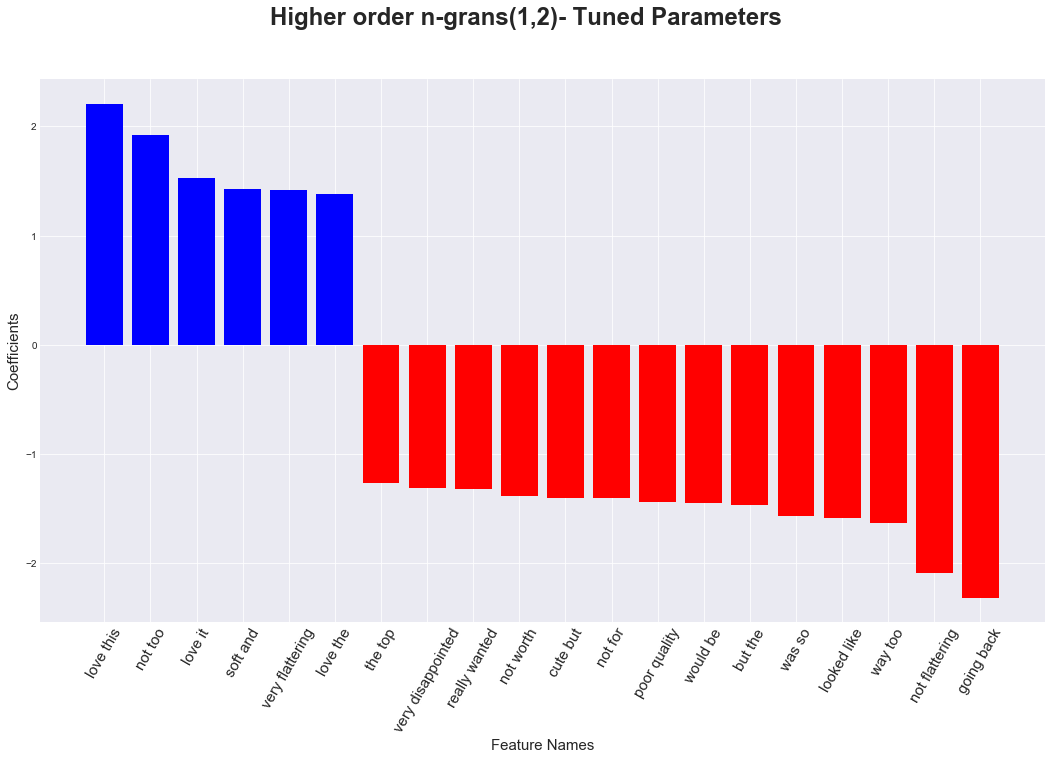

In [205]:
fig, axes = plt.subplots(1,1,figsize = (18,10))
colors = ['blue' if x > 0 else 'red' for x in top20_feat_df.Coefficient ]
axes.bar(range(20),top20_feat_df.Coefficient,color=colors)
axes.set_xticks(range(20))
axes.set_xticklabels(top20_feat_df.Feature,fontdict={'fontsize':15},
                     rotation = 60)
axes.set_xlabel("Feature Names",fontsize=15)
axes.set_ylabel("Coefficients",fontsize=15)
plt.suptitle("Higher order n-grans(1,2)\
- Tuned Parameters",fontsize=24,fontweight='bold')
plt.show()

## 3.2 Try using character n-grams.

In [105]:
param_grid_32 = {'logisticregression__C': np.logspace(-3, 3, 10),
                 'logisticregression__class_weight': ['balanced'],
                'tfidfvectorizer__ngram_range':[(1,1),(1,2),(1,5),(1,7),
                                               (2,3),(3,5),(3,8),(5,5)]}
grid_logit_32 = GridSearchCV(make_pipeline(TfidfVectorizer(analyzer="char_wb"),
                                           LogisticRegression(),
                                           memory = "cache_folder"),
                          param_grid= param_grid_32, 
                             scoring=ROC_AUC_score, cv=5)
grid_logit_32.fit(non_text_train['text'].values,y_train_2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='char_wb', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smoot...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03]), 'logisticregression__class_weight': ['balanced'], 'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 5), (1, 7), (2, 3), (3, 5), (3, 8), (5, 5)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), ver

In [262]:
#print("Best params:", grid_logit_32.best_params_)
print("Best params:")
for key,value in grid_logit_32.best_params_.items():
    print("{}: {}".format(key,value))

Best params:
logisticregression__C: 0.46415888336127775
logisticregression__class_weight: balanced
tfidfvectorizer__ngram_range: (5, 5)


In [227]:
train_32_pred = grid_logit_32.best_estimator_.predict(
    non_text_train['text'].values)
train_32_avg_pre = average_precision_score(y_train_2, 
                                           train_32_pred)
train_auc_32_score = roc_auc_score(y_train_2, train_32_pred)
train_f1_32_score = f1_score(y_train_2, train_32_pred)
print("Training data scores:")
print("AUC score:", train_auc_32_score)
print("Average precision:", train_32_avg_pre)
print("f1_score:", train_f1_32_score)

Training data scores:
AUC score: 0.9222729925867034
Average precision: 0.9698546961503532
f1_score: 0.9401417299090316


In [228]:
test_32_pred = grid_logit_32.best_estimator_.predict(
    test_df['text'].values)
test_32_avg_pre = average_precision_score(y_test_2, 
                                          test_32_pred)
test_auc_32_score = roc_auc_score(y_test_2, test_32_pred)
test_f1_32_score = f1_score(y_test_2, test_32_pred)
print("Test data scores:")
print("AUC score:", test_auc_32_score)
print("Average precision:", test_32_avg_pre)
print("f1_score:", test_f1_32_score)

Test data scores:
AUC score: 0.8762517635196109
Average precision: 0.9525797397285337
f1_score: 0.9126925898752752


## Visualize the coefficients.

In [109]:
feature_names_32 = grid_logit_32.best_estimator_\
.steps[0][1].get_feature_names()
coef_32 = grid_logit_32.best_estimator_.steps[1][1].coef_[0]
top_20_feat = (np.absolute(coef_32).argsort())[-20:]
top20_feat_names = np.array(feature_names_32)[top_20_feat]
top20_coef = coef_32[top_20_feat]
top20_feat_df = pd.DataFrame(list(zip(top20_feat_names,top20_coef)),
                             columns = ['Feature','Coefficient'])
top20_feat_df = top20_feat_df.sort_values(by='Coefficient',
                                          ascending = False)
print(top20_feat_df)

   Feature  Coefficient
17   love      3.471962
16    love     3.433342
15   great     2.602406
14    grea     2.593454
11   perfe     2.366794
9    rfect     2.363757
8    erfec     2.363253
5     perf     2.346664
4     soft     2.296077
3    reat      2.230779
2     with     2.155153
1     comf     2.140079
0    anted    -2.113751
6    retur    -2.360240
7     retu    -2.362027
10   nted     -2.364614
12    huge    -2.367660
13   eturn    -2.368777
18    not     -4.359156
19    was     -4.531953


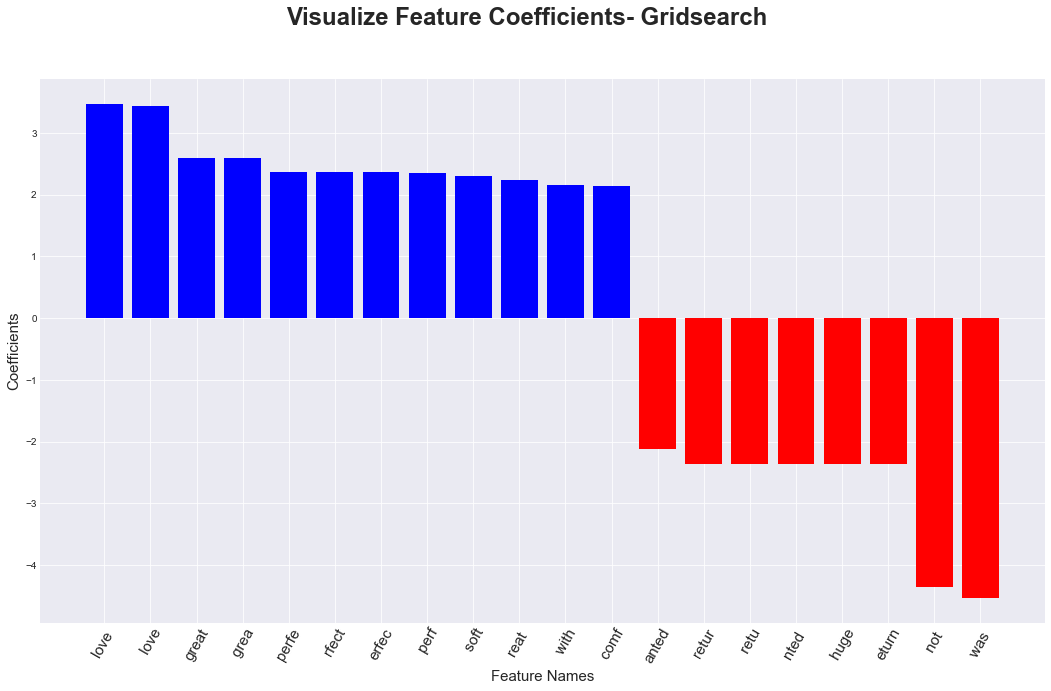

In [110]:
fig, axes = plt.subplots(1,1,figsize = (18,10))
colors = ['blue' if x > 0 else 'red' for x in top20_feat_df.Coefficient ]
axes.bar(range(20),top20_feat_df.Coefficient,color=colors)
axes.set_xticks(range(20))
axes.set_xticklabels(top20_feat_df.Feature,fontdict={'fontsize':15},
                     rotation = 60)
axes.set_xlabel("Feature Names",fontsize=15)
axes.set_ylabel("Coefficients",fontsize=15)
plt.suptitle("Visualize Feature Coefficients\
- Gridsearch",fontsize=24,fontweight='bold')
plt.show()

## Can we learn something from this?

* We see a lot of repeated(in parts) features which also have the same 
  repeated feature improtances 
* Words with trailing spaces are treated as a new feature 

## 3.3 Investigate how min_df and the use of stop-words changes the number of features when using word n-grams

### using stopwords

In [187]:
param_grid_33 = {'logisticregression__C': np.logspace(-3, 3, 10),
                 'logisticregression__class_weight': ['balanced'],
                'tfidfvectorizer__ngram_range':[(1,2)]}
grid_logit_33 = GridSearchCV(make_pipeline(TfidfVectorizer(
    stop_words=eng_stopwords), 
                                           LogisticRegression(),
                                           memory = "cache_folder"),
                          param_grid= param_grid_33, 
                             scoring=ROC_AUC_score, cv=5)
grid_logit_33.fit(non_text_train['text'].values,y_train_2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03]), 'logisticregression__class_weight': ['balanced'], 'tfidfvectorizer__ngram_range': [(1, 2)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [263]:
#print("Best params:", grid_logit_33.best_params_)
print("Best params:")
for key,value in grid_logit_33.best_params_.items():
    print("{}: {}".format(key,value))

Best params:
logisticregression__C: 0.46415888336127775
logisticregression__class_weight: balanced
tfidfvectorizer__ngram_range: (1, 2)


In [189]:
train_33_pred = grid_logit_33.best_estimator_.predict(
    non_text_train['text'].values)
train_33_avg_pre = average_precision_score(y_train_2,
                                           train_33_pred)
train_auc_33_score = roc_auc_score(y_train_2, train_33_pred)
train_f1_33_score = f1_score(y_train_2, train_33_pred)
print("Training data scores:")
print("AUC score:", train_auc_33_score)
print("Average precision:", train_33_avg_pre)
print("f1_score:", train_f1_33_score)

Training data scores:
AUC score: 0.9436856339957063
Average precision: 0.9783388061189803
f1_score: 0.954690300736905


In [190]:
test_33_pred = grid_logit_33.best_estimator_.predict(
    test_df['text'].values)
test_33_avg_pre = average_precision_score(y_test_2, 
                                          test_33_pred)
test_auc_33_score = roc_auc_score(y_test_2, test_33_pred)
test_f1_33_score = f1_score(y_test_2, test_33_pred)
print("Test data scores:")
print("AUC score:", test_auc_33_score)
print("Average precision:", test_33_avg_pre)
print("f1_score:", test_f1_33_score)

Test data scores:
AUC score: 0.8595694681973334
Average precision: 0.9455821462069263
f1_score: 0.9133720930232558


In [206]:
print("number of features of word n_grams without using stopwords and min_df are:")
print(len(grid_logit_31.best_estimator_\
          .steps[0][1].get_feature_names()))

number of features of word n_grams without using stopwords and min_df are:
173741


In [207]:
print("number of features of word n_grams by using stopwords and min_df are:")
print(len(grid_logit_33.best_estimator_\
          .steps[0][1].get_feature_names()))

number of features of word n_grams by using stopwords and min_df are:
180690


* **By using stopwords and minimum document frequency, number of features got reduced by 9000**

In [208]:
feature_names_33 = grid_logit_33.best_estimator_\
.steps[0][1].get_feature_names()
coef_33 = grid_logit_33.best_estimator_.steps[1][1].coef_[0]
top_20_feat = (np.absolute(coef_33).argsort())[-20:]
top20_feat_names = np.array(feature_names_33)[top_20_feat]
top20_coef = coef_33[top_20_feat]
top20_feat_df = pd.DataFrame(list(zip(top20_feat_names,top20_coef)),
                             columns = ['Feature','Coefficient'])
top20_feat_df = top20_feat_df.sort_values(by='Coefficient',
                                          ascending = False)
print(top20_feat_df)

          Feature  Coefficient
19           love     5.757087
18          great     4.941762
17        perfect     4.882913
15    comfortable     4.241738
10           soft     3.377033
9          little     3.363945
5            fits     3.022426
0            size     2.800603
1   unfortunately    -2.925535
2           cheap    -3.000272
3       returning    -3.014954
4             way    -3.018894
6          return    -3.139345
7    unflattering    -3.173105
8        returned    -3.204593
11         looked    -3.412157
12    wanted love    -3.431285
13           huge    -3.625530
14         wanted    -3.670918
16   disappointed    -4.758808


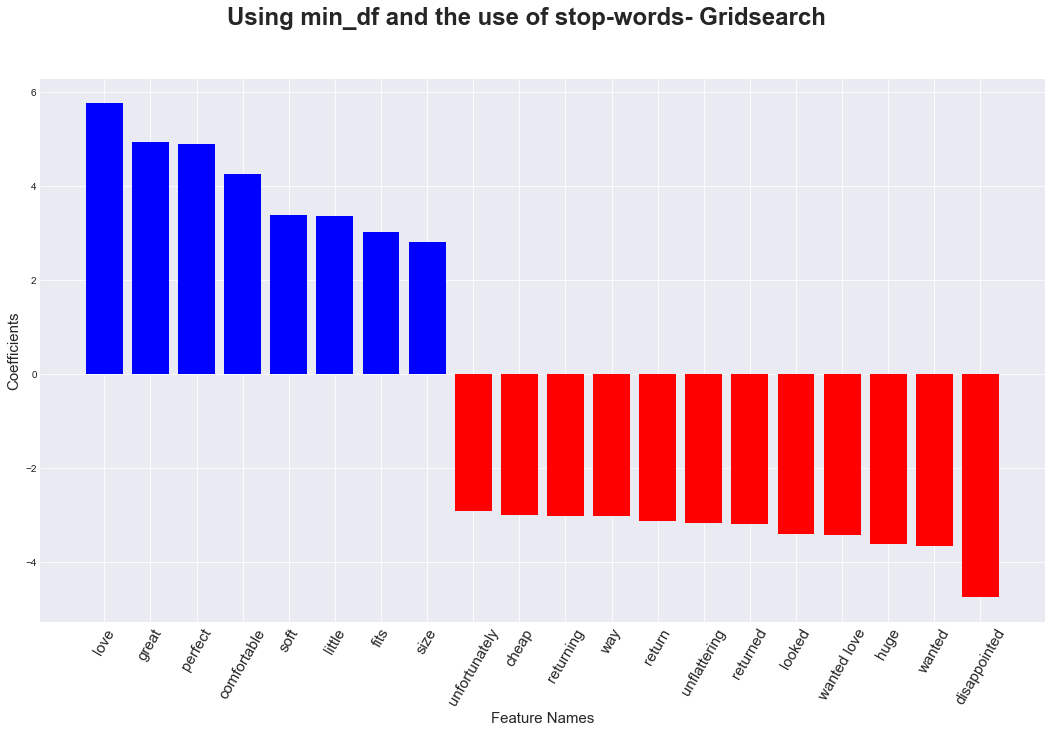

In [209]:
fig, axes = plt.subplots(1,1,figsize = (18,10))
colors = ['blue' if x > 0 else 'red' for x in top20_feat_df.Coefficient ]
axes.bar(range(20),top20_feat_df.Coefficient,color=colors)
axes.set_xticks(range(20))
axes.set_xticklabels(top20_feat_df.Feature,fontdict={'fontsize':15},
                     rotation = 60)
axes.set_xlabel("Feature Names",fontsize=15)
axes.set_ylabel("Coefficients",fontsize=15)
plt.suptitle("Using min_df and the use of stop-words\
- Gridsearch",fontsize=24,fontweight='bold')
plt.show()

### using min_df

In [222]:
param_grid_332 = {'logisticregression__C': np.logspace(-3, 3, 10),
                 'logisticregression__class_weight': ['balanced'],
                'tfidfvectorizer__ngram_range':[(1,2)],
                 'tfidfvectorizer__min_df':[2,3,4]}
grid_logit_332 = GridSearchCV(make_pipeline(TfidfVectorizer(
    stop_words=eng_stopwords),
                                            LogisticRegression()),
                          param_grid= param_grid_332, 
                              scoring=ROC_AUC_score, cv=5)
grid_logit_332.fit(non_text_train['text'].values,y_train_2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'tfidfvectorizer__min_df': [2, 3, 4], 'logisticregression__C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03]), 'logisticregression__class_weight': ['balanced'], 'tfidfvectorizer__ngram_range': [(1, 2)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [264]:
#print("Best params:", grid_logit_332.best_params_)
print("Best params:")
for key,value in grid_logit_332.best_params_.items():
    print("{}: {}".format(key,value))

Best params:
logisticregression__C: 0.46415888336127775
logisticregression__class_weight: balanced
tfidfvectorizer__ngram_range: (1, 2)
tfidfvectorizer__min_df: 4


In [224]:
train_332_pred = grid_logit_332.best_estimator_.predict(
    non_text_train['text'].values)
train_332_avg_pre = average_precision_score(y_train_2, 
                                            train_332_pred)
train_auc_332_score = roc_auc_score(y_train_2, train_332_pred)
train_f1_332_score = f1_score(y_train_2, train_332_pred)
print("Training data scores:")
print("AUC score:", train_auc_332_score)
print("Average precision:", train_332_avg_pre)
print("f1_score:", train_f1_332_score)

Training data scores:
AUC score: 0.9262764148761036
Average precision: 0.9712595352308309
f1_score: 0.94514177126569


In [225]:
test_332_pred = grid_logit_332.best_estimator_.predict(
    test_df['text'].values)
test_332_avg_pre = average_precision_score(y_test_2, 
                                           test_332_pred)
test_auc_332_score = roc_auc_score(y_test_2, test_332_pred)
test_f1_332_score = f1_score(y_test_2, test_332_pred)
print("Test data scores:")
print("AUC score:", test_auc_332_score)
print("Average precision:", test_332_avg_pre)
print("f1_score:", test_f1_332_score)

Test data scores:
AUC score: 0.8635148799394436
Average precision: 0.9473589630442557
f1_score: 0.9106855722847538


In [226]:
print("number of features using minimum document frequency are:")
print(len(grid_logit_332.best_estimator_\
          .steps[0][1].get_feature_names()))

number of features using minimum document frequency are:
17364


* **By using min_df = 4 (best parameter) the number of features got reduced by 10 fold**
* **By using min_df and stop words , the accuracy scores - AUC and Avg. Precision reduced**

#### The best model from the analysis in previous tasks:

* **Best performance was found for Tfidf with using both unigram and bigram**

### Main test score using best model

In [245]:
main_test_3_pred = grid_logit_31.best_estimator_.predict(
    main_test_data['text'].values)
main_test_3_avg_pre = average_precision_score(y_test_main,
                                              main_test_3_pred)
main_test_auc_3_score = roc_auc_score(y_test_main, main_test_3_pred)
main_test_f1_3_score = f1_score(y_test_main, main_test_3_pred)
print("Main Test data scores:")
print("AUC score:", main_test_auc_3_score)
print("Average precision:", main_test_3_avg_pre)
print("f1_score:", main_test_f1_3_score)

Main Test data scores:
AUC score: 0.8694837061243322
Average precision: 0.9489826996867079
f1_score: 0.9260256272208462


### Main test accuracy got increased from Task 2 to Task 3

# 4 Task 4 Model Tuning (again)

##### L1 penalty for Logistic regression:

In [231]:
param_grid_41 = {'logisticregression__C': np.logspace(-3, 3, 10)}
grid_logit_41 = GridSearchCV(make_pipeline(TfidfVectorizer(ngram_range=(1,2)),
                                           LogisticRegression(
                                               penalty='l1',
                                               class_weight="balanced"),
                                           memory = "cache_folder"),
                          param_grid= param_grid_41, 
                             scoring=ROC_AUC_score, cv=5)
grid_logit_41.fit(non_text_train['text'].values,y_train_2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_i...ty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [232]:
print("Best params:", grid_logit_41.best_params_)

Best params: {'logisticregression__C': 2.154434690031882}


In [233]:
train_41_pred = grid_logit_41.best_estimator_.predict(
    non_text_train['text'].values)
train_41_avg_pre = average_precision_score(y_train_2, 
                                           train_41_pred)
train_auc_41_score = roc_auc_score(y_train_2, train_41_pred)
train_f1_41_score = f1_score(y_train_2, train_41_pred)
print("Training data scores:")
print("AUC score:", train_auc_41_score)
print("Average precision:", train_41_avg_pre)
print("f1_score:", train_f1_41_score)

Training data scores:
AUC score: 0.9357031826492872
Average precision: 0.9751007649439972
f1_score: 0.9501472129347771


In [234]:
test_41_pred = grid_logit_41.best_estimator_.predict(
    test_df['text'].values)
test_41_avg_pre = average_precision_score(y_test_2, 
                                          test_41_pred)
test_auc_41_score = roc_auc_score(y_test_2, test_41_pred)
test_f1_41_score = f1_score(y_test_2, test_41_pred)
print("Test data scores:")
print("AUC score:", test_auc_41_score)
print("Average precision:", test_41_avg_pre)
print("f1_score:", test_f1_41_score)

Test data scores:
AUC score: 0.871456190571684
Average precision: 0.9502960583410144
f1_score: 0.9173938336242001


* **The performance of Logistic Regression deteriorated for L1 penalty as compared to L2 **

##### Fitting LinearSVC:

In [239]:
param_grid_42 = {'linearsvc__C': np.logspace(-3, 3, 10),
                'linearsvc__penalty':['l1','l2']}
grid_logit_42 = GridSearchCV(make_pipeline(TfidfVectorizer(
    ngram_range=(1,2)),
                                           LinearSVC(
                                               class_weight="balanced",
                                               dual=False),
                                           memory = "cache_folder"),
                          param_grid= param_grid_42,
                             scoring=ROC_AUC_score, cv=5)
grid_logit_42.fit(non_text_train['text'].values,y_train_2)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory='cache_folder',
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_i...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'linearsvc__penalty': ['l1', 'l2'], 'linearsvc__C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbose=0)

In [265]:
#print("Best params:", grid_logit_42.best_params_)
print("Best params:")
for key,value in grid_logit_42.best_params_.items():
    print("{}: {}".format(key,value))

Best params:
linearsvc__penalty: l2
linearsvc__C: 0.1


In [241]:
train_42_pred = grid_logit_42.best_estimator_.predict(
    non_text_train['text'].values)
train_42_avg_pre = average_precision_score(y_train_2,
                                           train_42_pred)
train_auc_42_score = roc_auc_score(y_train_2, train_42_pred)
train_f1_42_score = f1_score(y_train_2, train_42_pred)
print("Training data scores:")
print("AUC score:", train_auc_42_score)
print("Average precision:", train_42_avg_pre)
print("f1_score:", train_f1_42_score)

Training data scores:
AUC score: 0.9641488733321204
Average precision: 0.986728980180508
f1_score: 0.9657666584097102


In [242]:
test_42_pred = grid_logit_42.best_estimator_.predict(
    test_df['text'].values)
test_42_avg_pre = average_precision_score(y_test_2, 
                                          test_42_pred)
test_auc_42_score = roc_auc_score(y_test_2, test_42_pred)
test_f1_42_score = f1_score(y_test_2, test_42_pred)
print("Test data scores:")
print("AUC score:", test_auc_42_score)
print("Average precision:", test_42_avg_pre)
print("f1_score:", test_f1_42_score)

Test data scores:
AUC score: 0.8908842100208868
Average precision: 0.957092399077341
f1_score: 0.9402390438247012


* **The performance of LinesrSVC exceeds that of Logistic Regression so the best model is LinearSVC with parameters : <br>
penalty = 'l2'and C= 0.1 **

### **Predicting on the main test data using the best model:**

In [244]:
main_test_4_pred = grid_logit_42.best_estimator_.predict(
    main_test_data['text'].values)
main_test_4_avg_pre = average_precision_score(y_test_main,
                                              main_test_4_pred)
main_test_auc_4_score = roc_auc_score(y_test_main, main_test_4_pred)
main_test_f1_4_score = f1_score(y_test_main, main_test_4_pred)
print("Main Test data scores:")
print("AUC score:", main_test_auc_4_score)
print("Average precision:", main_test_4_avg_pre)
print("f1_score:", main_test_f1_4_score)

Main Test data scores:
AUC score: 0.877249289060758
Average precision: 0.9517221996417261
f1_score: 0.9346293527024141


* **The final best AUC score on the main test dataset is 0.8772 **

### Are there any other obvious features to try, or combinations to try out? (Don’t perform them, just list them).

We could have tried the below features :
* We can use Lemmization to strip the words to their root words since top features had many repeated root     words for most models
* We could change the tokenization pattern to greater than 2 word length to remove short filler words like "OK"
* We could remove a few stop words like "With", "too" from standard english stop words because these words are important for classification as reported by most models 
* We could edit tokenizers such that we also capture punctuations because they could signify sentiment of the text